# A/B hackathon

Цель А/Б теста: выяснить какая модель расчёта ставки является наиболее эффективной. 

Нулевая гипотеза: нет статистически значимой разницы для бизнеса при использовании различных моделей ставки (сравнение средних по целевой метрике).

Альтернативная гипотеза: статистически значимая разница для бизнеса существует.

Целевые метрики: Cost per click (CPC), Cost per view (CPV).

Экспериментальная группа: Пользователи, которым была применена модель "Средняя Ставка" для расчета ставок в рекламной кампании.

Контрольная группа: Пользователи, которым была применена модель "Максимальная Ставка" для расчета ставок в рекламной кампании.

Уровень статистической значимости: 0,05.

Параметры эксперимента:
* Размер выборки: 2123249 и 3177233 просмотров обьявлений для модели "Средняя Ставка" и модели "Максимальная Ставка" соответственно.
* Факторы воздействия:
    * Изменение модели расчета ставок: "Максимальная Ставка" (контрольная группа) и "Средняя Ставка" (экспериментальная группа).
* Длительность эсперимента: 30 дней.



## Импорт библиотек.

In [1]:
# ! pip install pandas
# ! pip install matplotlib
# ! pip install scipy
# ! pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from scipy.stats import kstest

import scipy.stats as stats

import seaborn as sns

from IPython.display import display

import matplotlib

from statsmodels.stats.power import TTestIndPower

In [3]:
sns.set(style="whitegrid")

# Проверка разделения наблюдений на экспериментальную и контрольную группы на основе данных, полученных после проведения эксперимента.

Импорт файлов, удаление пустой колонки в контрольной группе и соответствующей этому же числу месяца в тестовой

In [4]:
test_df = pd.read_csv('test_group.csv')

In [5]:
test_df = test_df[test_df['Date'] != '5.08.2019']

In [6]:
test_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [7]:
test_df

Campaign Name        Date  Spend [USD]  # of Impressions   Reach  \
0   Test Campaign   1.08.2019         3008             39550   35820   
1   Test Campaign   2.08.2019         2542            100719   91236   
2   Test Campaign   3.08.2019         2365             70263   45198   
3   Test Campaign   4.08.2019         2710             78451   25937   
5   Test Campaign   6.08.2019         2458             42684   31489   
6   Test Campaign   7.08.2019         2838             53986   42148   
7   Test Campaign   8.08.2019         2916             33669   20149   
8   Test Campaign   9.08.2019         2652             45511   31598   
9   Test Campaign  10.08.2019         2790             95054   79632   
10  Test Campaign  11.08.2019         2420             83633   71286   
11  Test Campaign  12.08.2019         2831            124591   10598   
12  Test Campaign  13.08.2019         1972             65827   49531   
13  Test Campaign  14.08.2019         2537             56304   25982   
14  Test Campaign  15.08.2019         2516             94338   76219   
15  Test Campaign  16.08.2019         3076            106584   81389   
16  Test Campaign  17.08.2019         1968             95843   54389   
17  Test Campaign  18.08.2019         1979             53632   43241   
18  Test Campaign  19.08.2019         2626             22521   10698   
19  Test Campaign  20.08.2019         2712             39470   31893   
20  Test Campaign  21.08.2019         3112            133771  109834   
21  Test Campaign  22.08.2019         2899             34752   27932   
22  Test Campaign  23.08.2019         2407             60286   49329   
23  Test Campaign  24.08.2019         2078             36650   30489   
24  Test Campaign  25.08.2019         2928            120576  105978   
25  Test Campaign  26.08.2019         2311             80841   61589   
26  Test Campaign  27.08.2019         2915            111469   92159   
27  Test Campaign  28.08.2019         2247             54627   41267   
28  Test Campaign  29.08.2019         2805             67444   43219   
29  Test Campaign  30.08.2019         1977            120203   89380   

    # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                  3038           1946               1069               894   
1                  4657           2359               1548               879   
2                  7885           2572               2367              1268   
3                  4216           2216               1437               566   
5                  7488           1854               1073               882   
6                  4221           2733               2182              1301   
7                  7184           2867               2194              1240   
8                  8259           2899               2761              1200   
9                  8125           2312               1804               424   
10                 3750           2893               2617              1075   
11                 8264           2081               1992              1382   
12                 7568           2213               2058              1391   
13                 3993           1979               1059               779   
14                 4993           2537               1609              1090   
15                 6800           2661               2594              1059   
16                 7910           1995               1576               383   
17                 6909           2824               2522               461   
18                 7617           2924               2801               788   
19                 6050           2061               1894              1047   
20                 5471           1995               1868               278   
21                 4431           1983               1131               367   
22                 5077           2592               2004               632   
23                 7156   

Проверка данных тестовой выборки на аномальные значения

In [8]:
test_df.describe()

Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    29.000000         29.000000      29.000000            29.000000   
mean   2572.241379      73215.482759   52055.482759          6038.172414   
std     351.155100      31786.355952   28190.975729          1738.505086   
min    1968.000000      22521.000000   10598.000000          3038.000000   
25%    2365.000000      45511.000000   31489.000000          4399.000000   
50%    2626.000000      67444.000000   43241.000000          6435.000000   
75%    2838.000000      95843.000000   76219.000000          7617.000000   
max    3112.000000     133771.000000  109834.000000          8264.000000   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count      29.000000          29.000000         29.000000      29.000000  
mean     2429.758621        1892.482759        878.965517     512.724138  
std       391.022986         577.063355        353.446953     209.480633  
min      1854.000000        1046.000000        278.000000     238.000000  
25%      2037.000000        1437.000000        566.000000     284.000000  
50%      2432.000000        1894.000000        992.000000     488.000000  
75%      2824.000000        2427.000000       1168.000000     677.000000  
max      2978.000000        2801.000000       1391.000000     890.000000

In [9]:
control_df = pd.read_csv('control_group.csv')

In [10]:
control_df.dropna(inplace=True)

In [11]:
control_df

Campaign Name        Date  Spend [USD]  # of Impressions     Reach  \
0   Control Campaign   1.08.2019         2280           82702.0   56930.0   
1   Control Campaign   2.08.2019         1757          121040.0  102513.0   
2   Control Campaign   3.08.2019         2343          131711.0  110862.0   
3   Control Campaign   4.08.2019         1940           72878.0   61235.0   
5   Control Campaign   6.08.2019         3083          109076.0   87998.0   
6   Control Campaign   7.08.2019         2544          142123.0  127852.0   
7   Control Campaign   8.08.2019         1900           90939.0   65217.0   
8   Control Campaign   9.08.2019         2813          121332.0   94896.0   
9   Control Campaign  10.08.2019         2149          117624.0   91257.0   
10  Control Campaign  11.08.2019         2490          115247.0   95843.0   
11  Control Campaign  12.08.2019         2319          116639.0  100189.0   
12  Control Campaign  13.08.2019         2697           82847.0   68214.0   
13  Control Campaign  14.08.2019         1875          145248.0  118632.0   
14  Control Campaign  15.08.2019         2774          132845.0  102479.0   
15  Control Campaign  16.08.2019         2024           71274.0   42859.0   
16  Control Campaign  17.08.2019         2177          119612.0  106518.0   
17  Control Campaign  18.08.2019         1876          108452.0   96518.0   
18  Control Campaign  19.08.2019         2596          107890.0   81268.0   
19  Control Campaign  20.08.2019         2675          113430.0   78625.0   
20  Control Campaign  21.08.2019         1803           74654.0   59873.0   
21  Control Campaign  22.08.2019         2939          105705.0   86218.0   
22  Control Campaign  23.08.2019         2496          129880.0  109413.0   
23  Control Campaign  24.08.2019         1892           72515.0   51987.0   
24  Control Campaign  25.08.2019         1962          117006.0  100398.0   
25  Control Campaign  26.08.2019         2233          124897.0   98432.0   
26  Control Campaign  27.08.2019         2061          104678.0   91579.0   
27  Control Campaign  28.08.2019         2421          141654.0  125874.0   
28  Control Campaign  29.08.2019         2375           92029.0   74192.0   
29  Control Campaign  30.08.2019         2324          111306.0   88632.0   

    # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                7016.0         2290.0             2159.0            1819.0   
1                8110.0         2033.0             1841.0            1219.0   
2                6508.0         1737.0             1549.0            1134.0   
3                3065.0         1042.0              982.0            1183.0   
5                4028.0         1709.0             1249.0             784.0   
6                2640.0         1388.0             1106.0            1166.0   
7                7260.0         3047.0             2746.0             930.0   
8                6198.0         2487.0             2179.0             645.0   
9                2277.0         2475.0             1984.0            1629.0   
10               8137.0         2941.0             2486.0            1887.0   
11               2993.0         1397.0             1147.0            1439.0   
12               6554.0         2390.0             1975.0            1794.0   
13               4521.0         1209.0             1149.0            1339.0   
14               4896.0         1179.0             1005.0            1641.0   
15               5224.0         2427.0             2158.0            1613.0   
16               6628.0         1756.0             1642.0             878.0   
17               7253.0         2447.0             2115.0            1695.0   
18               3706.0         2483.0             2098.0             908.0   
19               2578.0         1001.0              848.0            1709.0   
20               5691.0         2711.0             2496.0            1460.0   
21               6843.0         3102.

Наблюдения действительно разделены на тестовую и контрольную группы

Проверка данных контрольной выборки на аномальные значения

In [12]:
control_df.describe()

Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    29.000000         29.000000      29.000000            29.000000   
mean   2304.068966     109559.758621   88844.931034          5320.793103   
std     363.534822      21688.922908   21832.349595          1757.369003   
min    1757.000000      71274.000000   42859.000000          2277.000000   
25%    1962.000000      92029.000000   74192.000000          4085.000000   
50%    2319.000000     113430.000000   91579.000000          5224.000000   
75%    2544.000000     121332.000000  102479.000000          6628.000000   
max    3083.000000     145248.000000  127852.000000          8137.000000   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count      29.000000          29.000000         29.000000      29.000000  
mean     2221.310345        1943.793103       1300.000000     522.793103  
std       866.089368         777.545469        407.457973     185.028642  
min      1001.000000         848.000000        442.000000     222.000000  
25%      1615.000000        1249.000000        930.000000     372.000000  
50%      2390.000000        1984.000000       1339.000000     501.000000  
75%      2711.000000        2421.000000       1641.000000     670.000000  
max      4891.000000        4219.000000       1913.000000     800.000000

Физически невозможные данные в тестовой и контрольной группах обнаружены не были

Стоит отметить, что на тестовую группу ("среднюю ставку") потратили в абсолютном значении больше средств

In [13]:
test_df['Spend [USD]'].sum()

74595

In [14]:
control_df['Spend [USD]'].sum()

66818

Возможно, вследствие этого количество просмотров объявлений в контрольной группе больше, чем в тестовой (проверим позже)

In [15]:
test_df['# of Impressions'].sum()

2123249

In [16]:
control_df['# of Impressions'].sum()

3177233.0

# Подсчет метрик на основе данных, полученных после проведения эксперимента. Проверка нормальности распределения.

## test_df analysis

Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное при уровне значимости 0.001. pvalue = 0.0


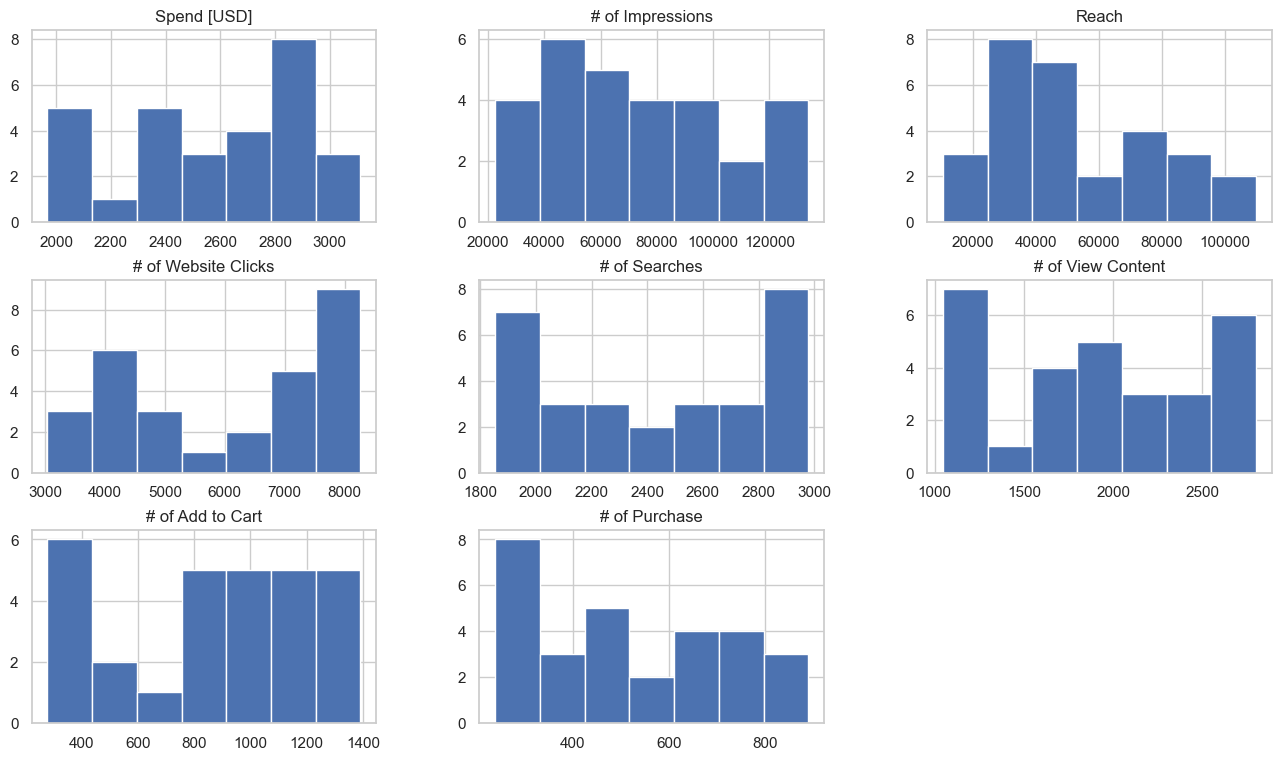

In [17]:
def hist_and_ktest(df, cut3 = False):
    df.hist(figsize=(16,9), bins = 7)

    def print_distribution_result(p_value, name, confidence = 0.001):
        if p_value >= confidence:
            print(f"Распределение данных в колонке '{name}' нормальное при уровне значимости {confidence}. pvalue = {p_value}")
        else:
            print(f"Нельзя сказать, что распределение у данных из колонки '{name}' нормальное при уровне значимости {confidence}. pvalue = {p_value}")
    if cut3:
        for colname in df.columns[2:]:
        
            p_value = kstest(df[colname], 'norm').pvalue
            print_distribution_result(p_value, colname)
    else:
        for colname in df.columns:
        
            p_value = kstest(df[colname], 'norm').pvalue
            print_distribution_result(p_value, colname)

hist_and_ktest(test_df, cut3 = True)


Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное при уровне значимости 0.001. pvalue = 0.0


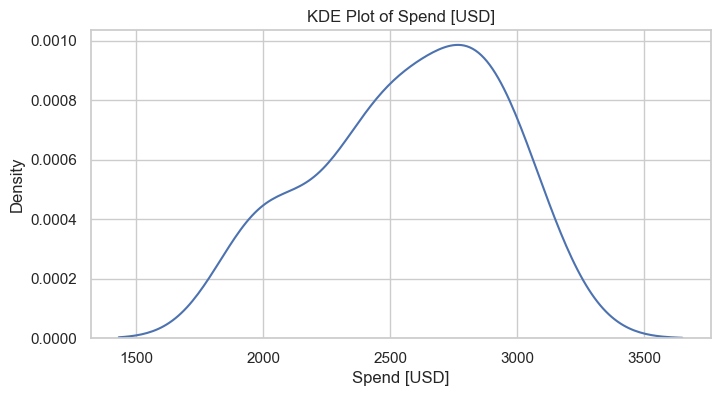

Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное при уровне значимости 0.001. pvalue = 0.0


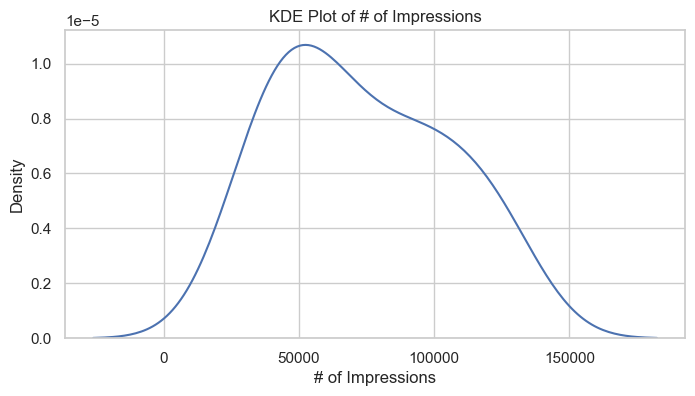

Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное при уровне значимости 0.001. pvalue = 0.0


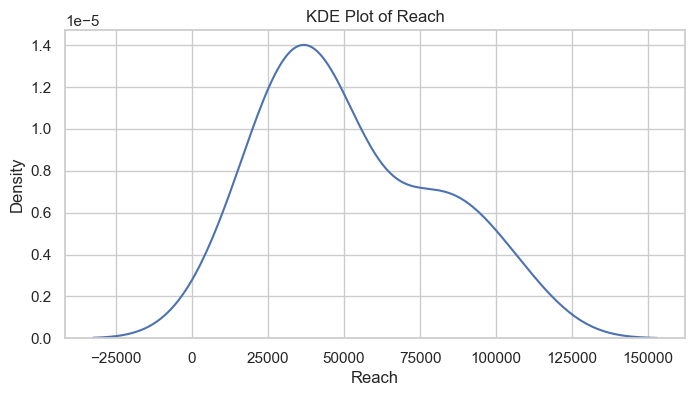

Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное при уровне значимости 0.001. pvalue = 0.0


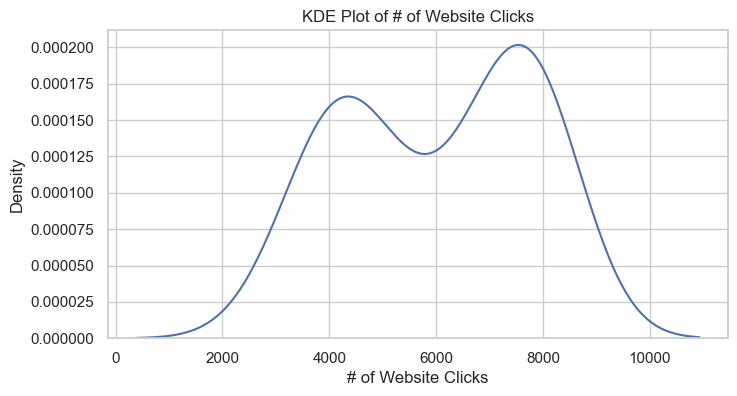

Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное при уровне значимости 0.001. pvalue = 0.0


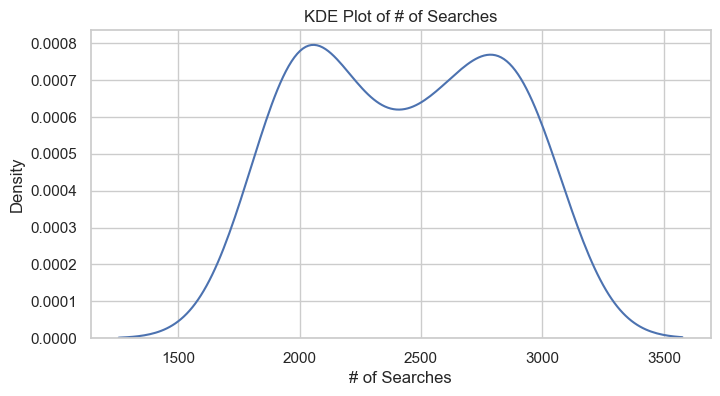

Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное при уровне значимости 0.001. pvalue = 0.0


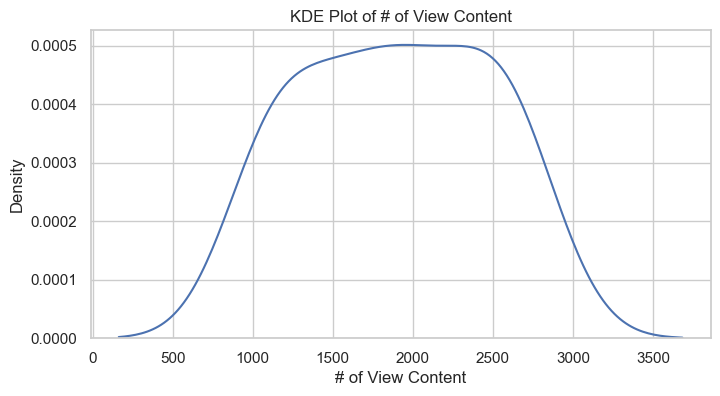

Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное при уровне значимости 0.001. pvalue = 0.0


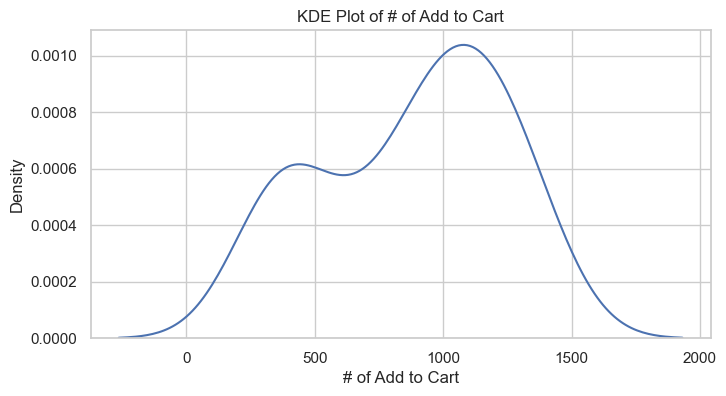

Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное при уровне значимости 0.001. pvalue = 0.0


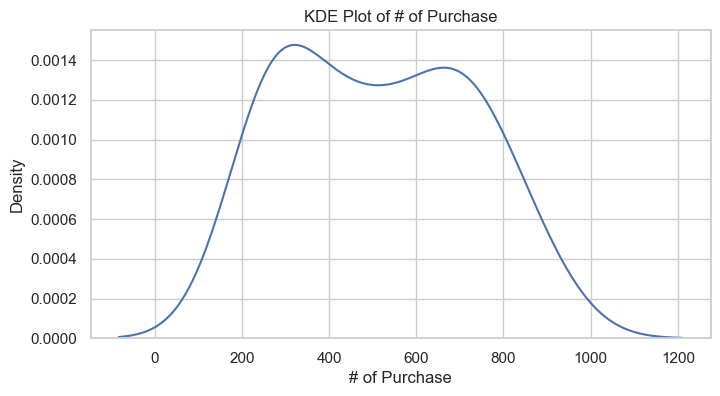

In [18]:
def kde_and_ktest(df, cut3 = False):
    def print_distribution_result(p_value, name, confidence = 0.001):
        if p_value >= confidence:
            print(f"Распределение данных в колонке '{name}' нормальное при уровне значимости {confidence}. pvalue = {p_value}")
        else:
            print(f"Нельзя сказать, что распределение у данных из колонки '{name}' нормальное при уровне значимости {confidence}. pvalue = {p_value}")
    if cut3:
        for colname in df.columns[2:]:
        
            p_value = kstest(df[colname], 'norm').pvalue
            print_distribution_result(p_value, colname)

            plt.figure(figsize=(8, 4))
            sns.kdeplot(data=df[colname])
            plt.title(f'KDE Plot of {colname}')
            plt.xlabel(colname)
            plt.ylabel('Density')
            plt.show()
    else:
        for colname in df.columns:
        
            p_value = kstest(df[colname], 'norm').pvalue
            print_distribution_result(p_value, colname)

            plt.figure(figsize=(8, 4))
            sns.kdeplot(data=df[colname])
            plt.title(f'KDE Plot of {colname}')
            plt.xlabel(colname)
            plt.ylabel('Density')
            plt.show()
kde_and_ktest(test_df, cut3 = True)



Стоит узнать, есть ли интересные паттерны поведения данных:

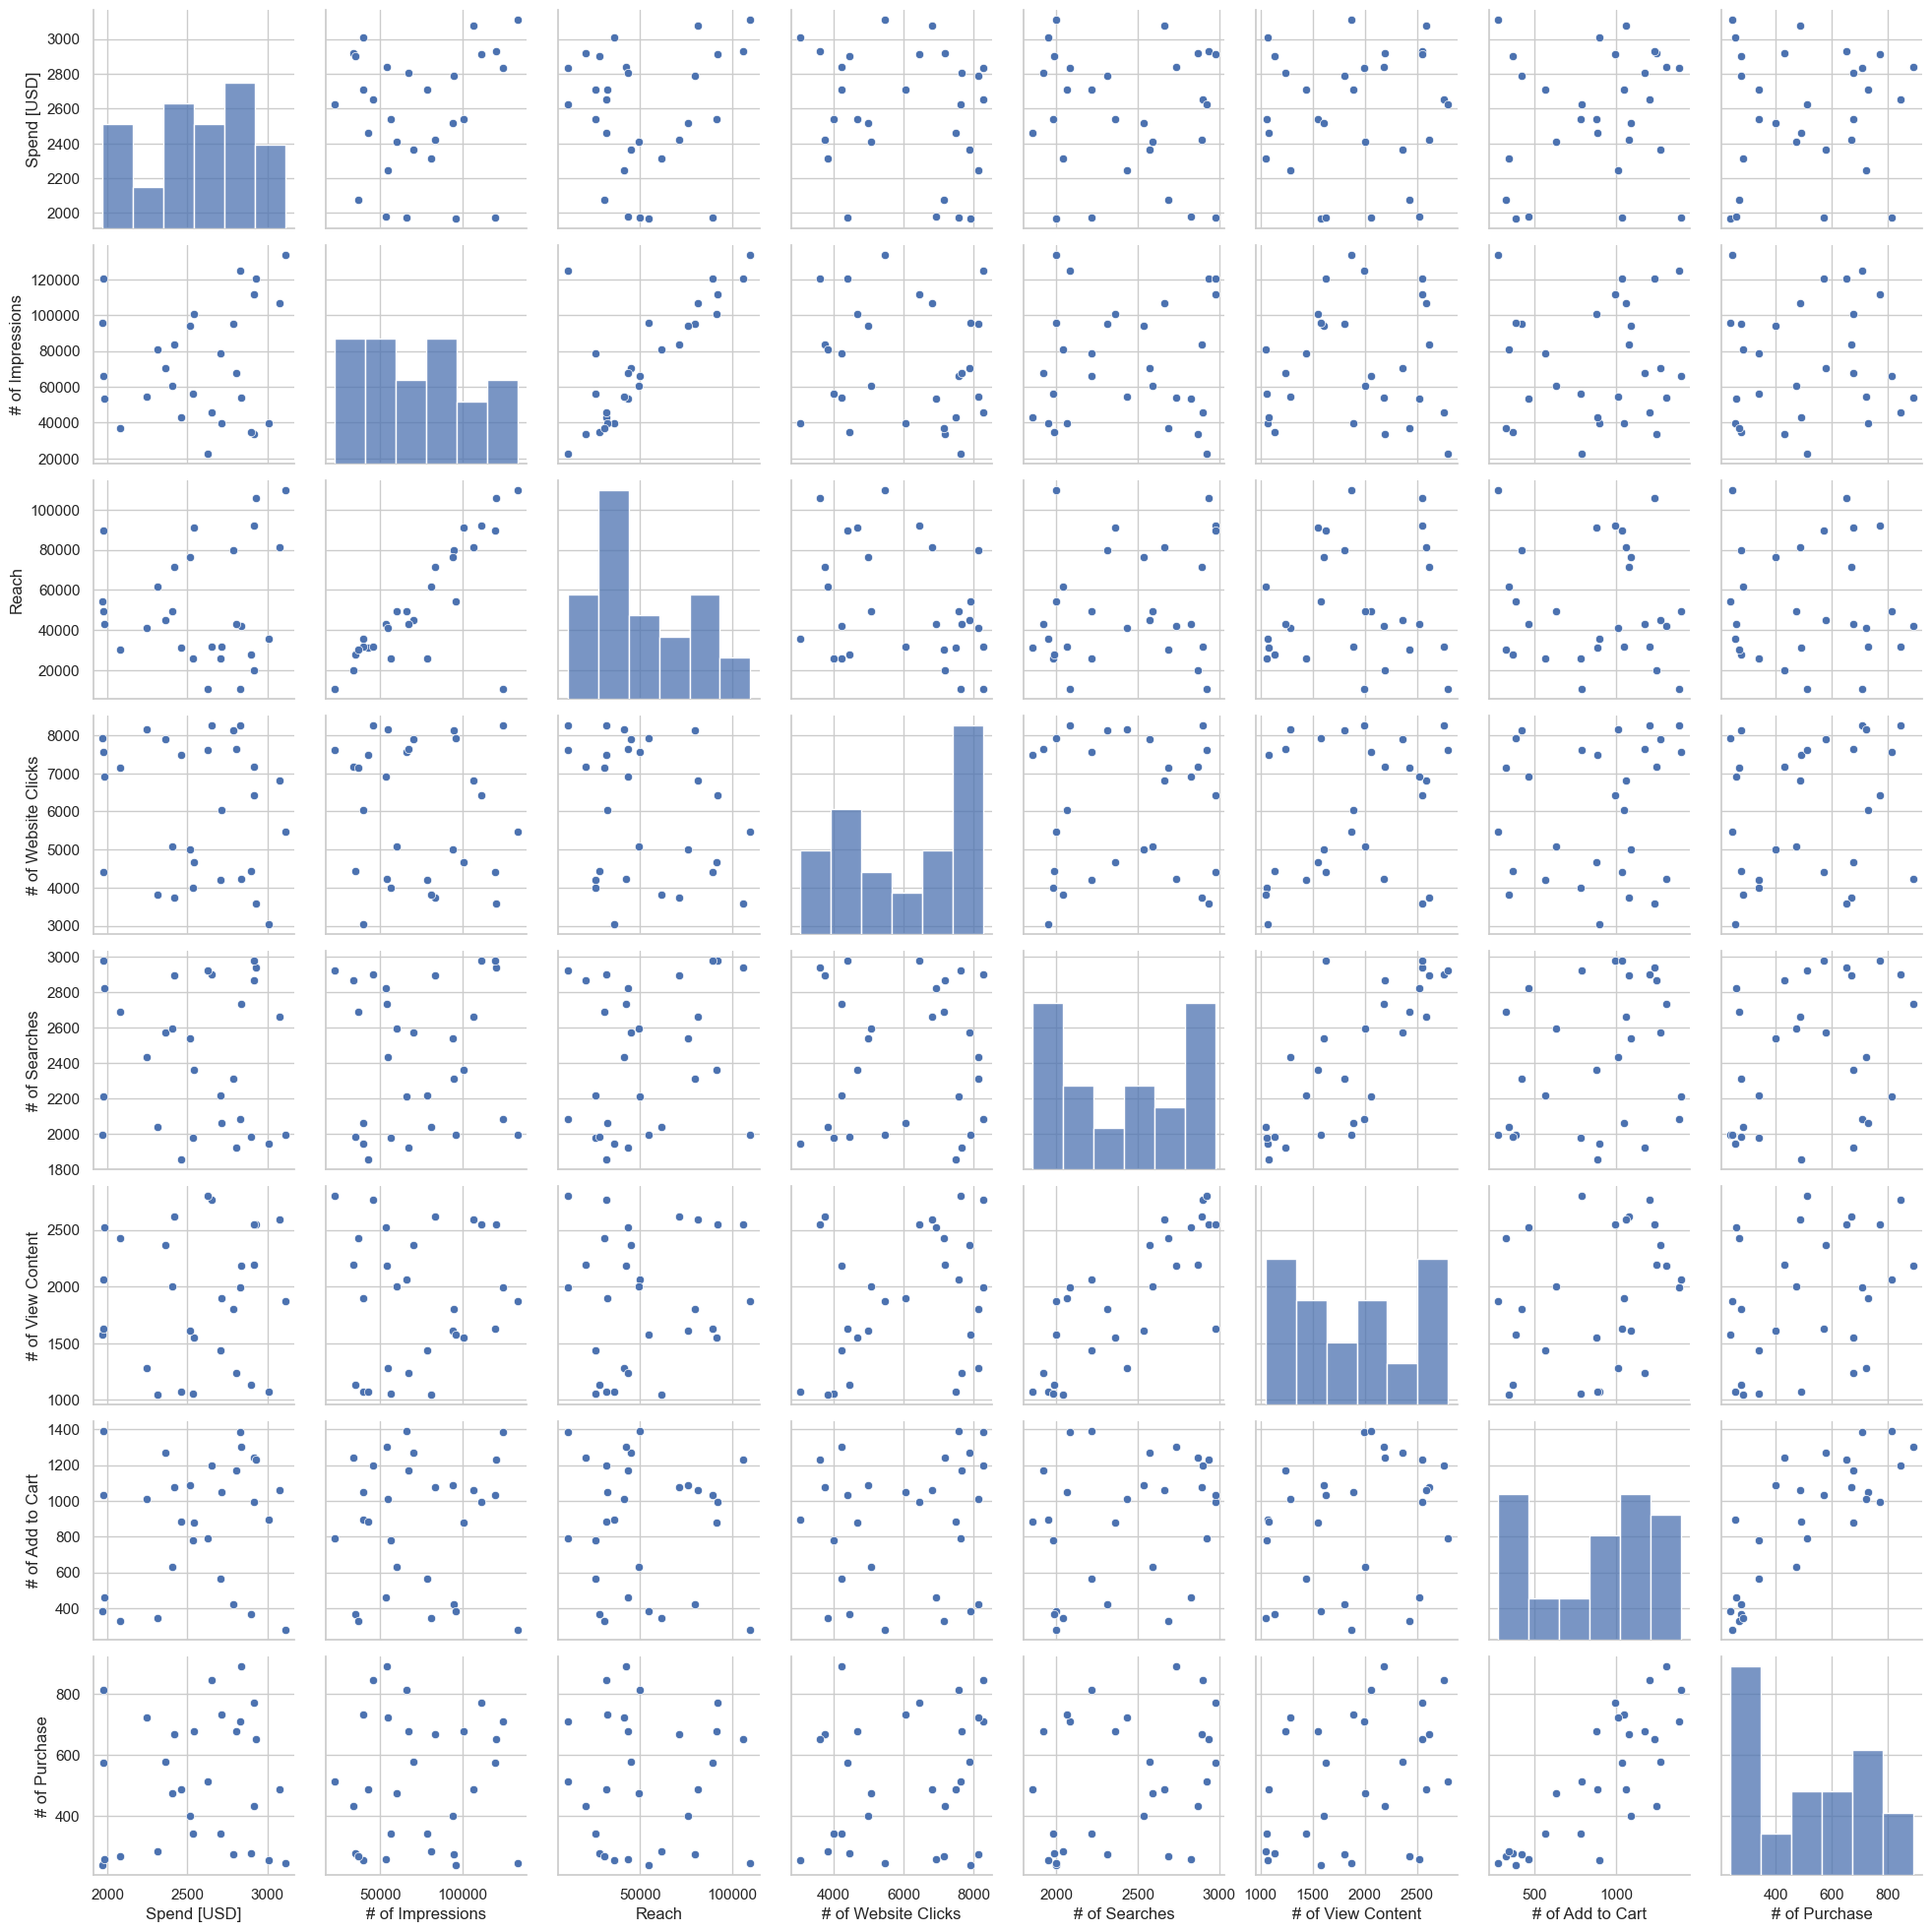

In [19]:
sns.pairplot(test_df)

Не были обнаружены

Конверсию с каждого шага на другой можно определить по элементам ниже на один, чем главная диагональ

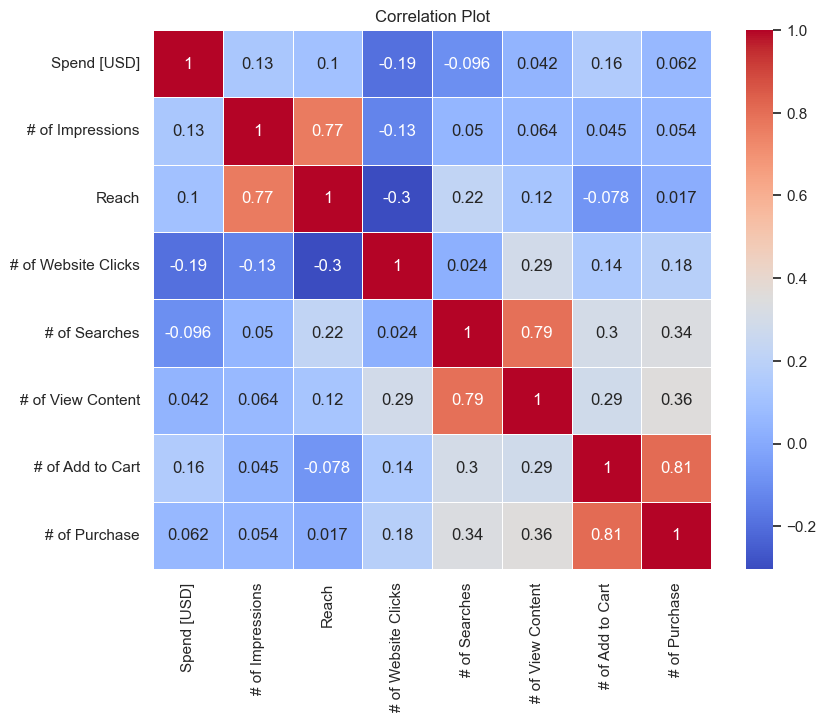

In [20]:
def draw_corr_matr(df, cut3 = False):
    if cut3:
        correlation_matrix = df.iloc[:,2:].corr(numeric_only=False)

    else:
        correlation_matrix = df.corr(numeric_only=False)

    plt.figure(figsize=(9, 7))

    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

    plt.title('Correlation Plot')
    plt.show()
    
draw_corr_matr(test_df, cut3 = True)


## control_df analysis

Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное при уровне значимости 0.001. pvalue = 0.0


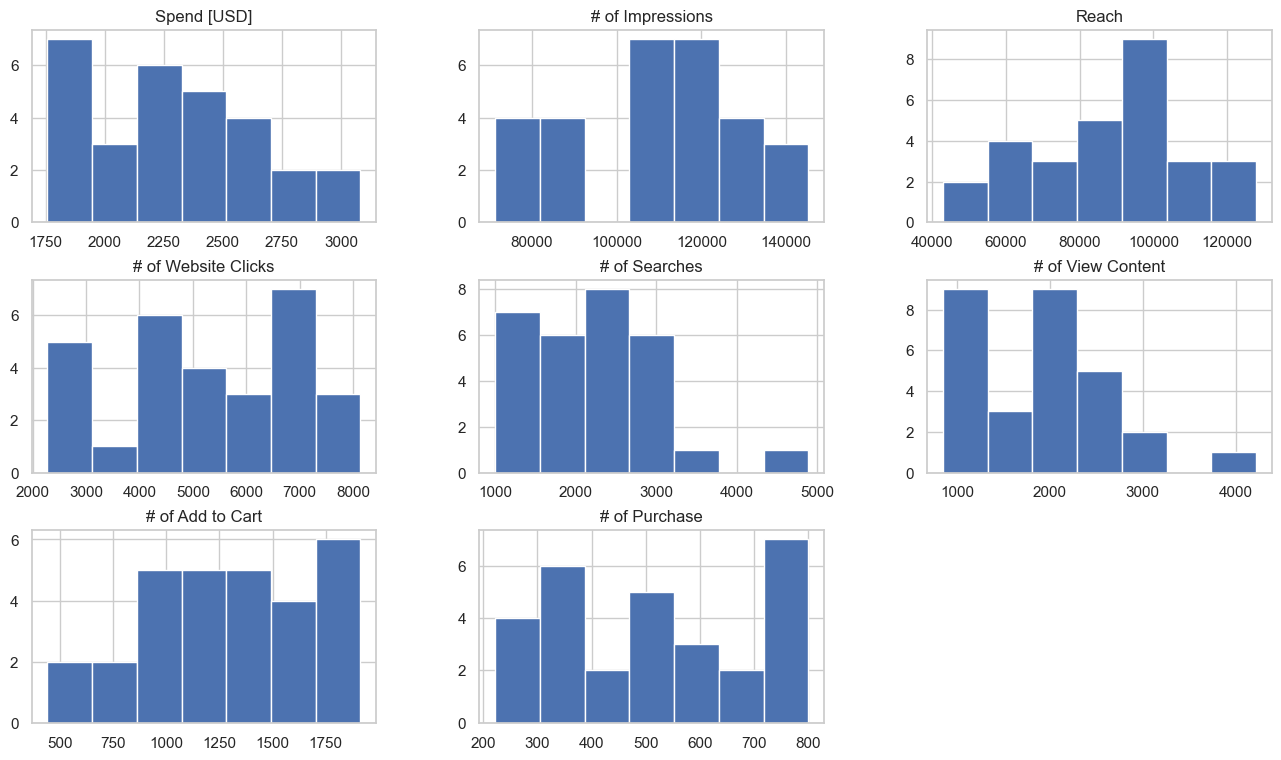

In [21]:
hist_and_ktest(control_df, cut3 = True)


Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное при уровне значимости 0.001. pvalue = 0.0


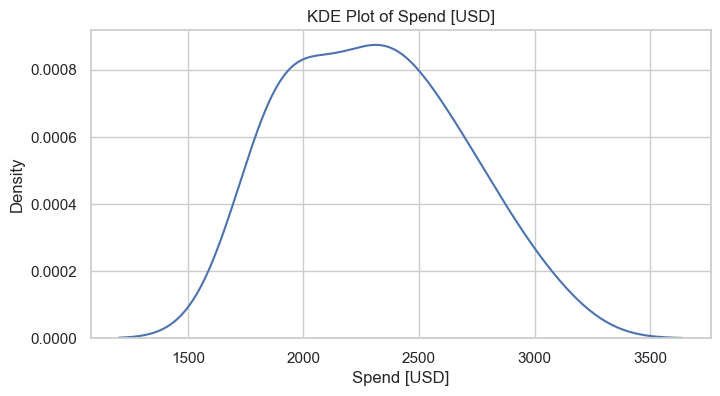

Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное при уровне значимости 0.001. pvalue = 0.0


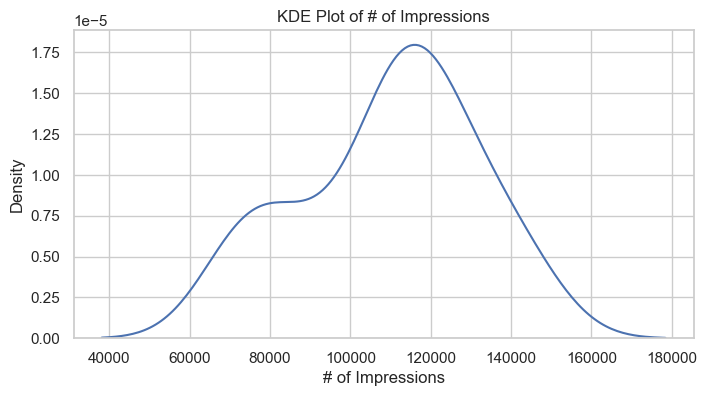

Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное при уровне значимости 0.001. pvalue = 0.0


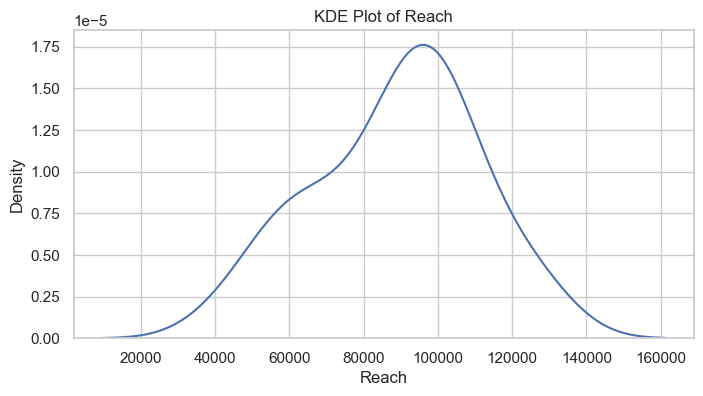

Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное при уровне значимости 0.001. pvalue = 0.0


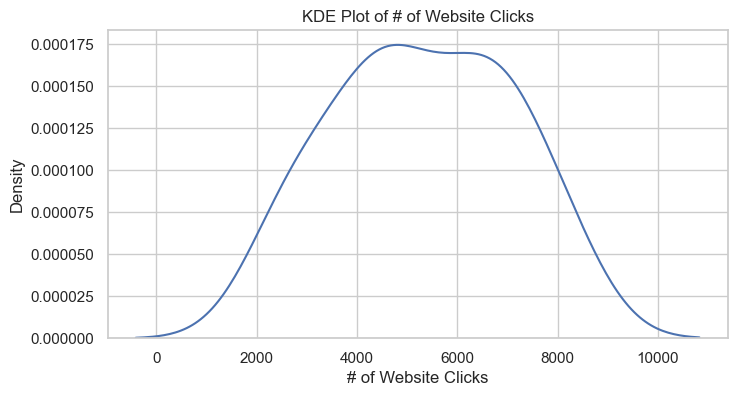

Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное при уровне значимости 0.001. pvalue = 0.0


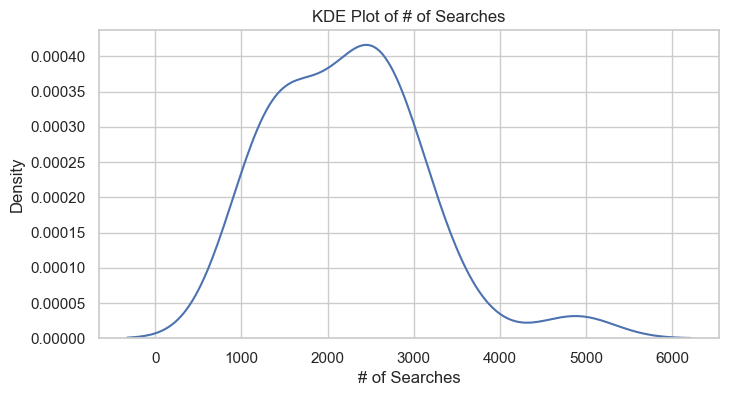

Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное при уровне значимости 0.001. pvalue = 0.0


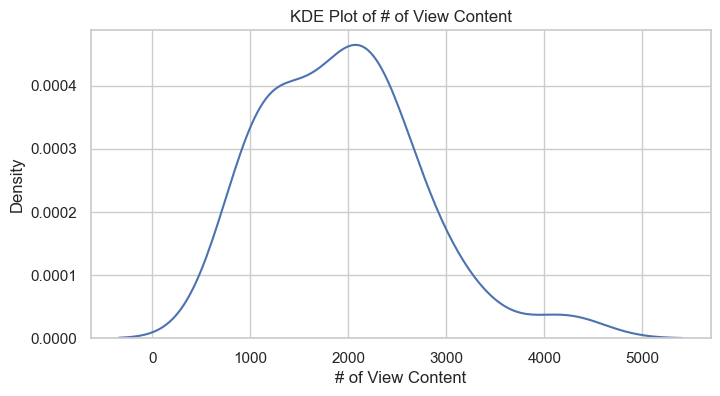

Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное при уровне значимости 0.001. pvalue = 0.0


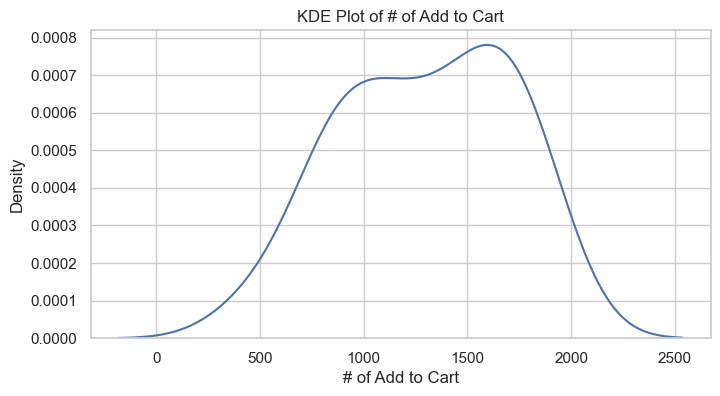

Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное при уровне значимости 0.001. pvalue = 0.0


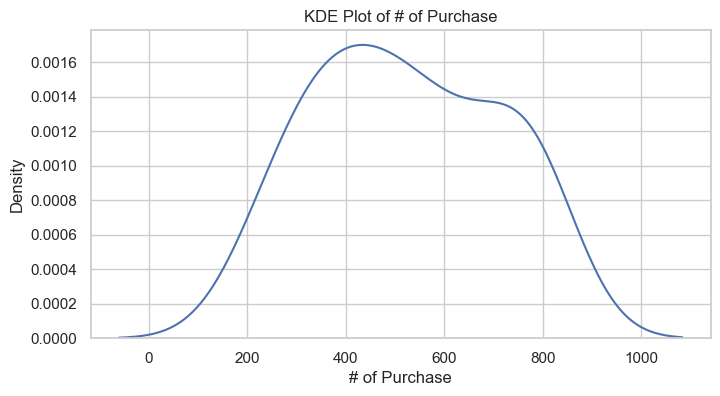

In [22]:
kde_and_ktest(control_df, cut3 = True)


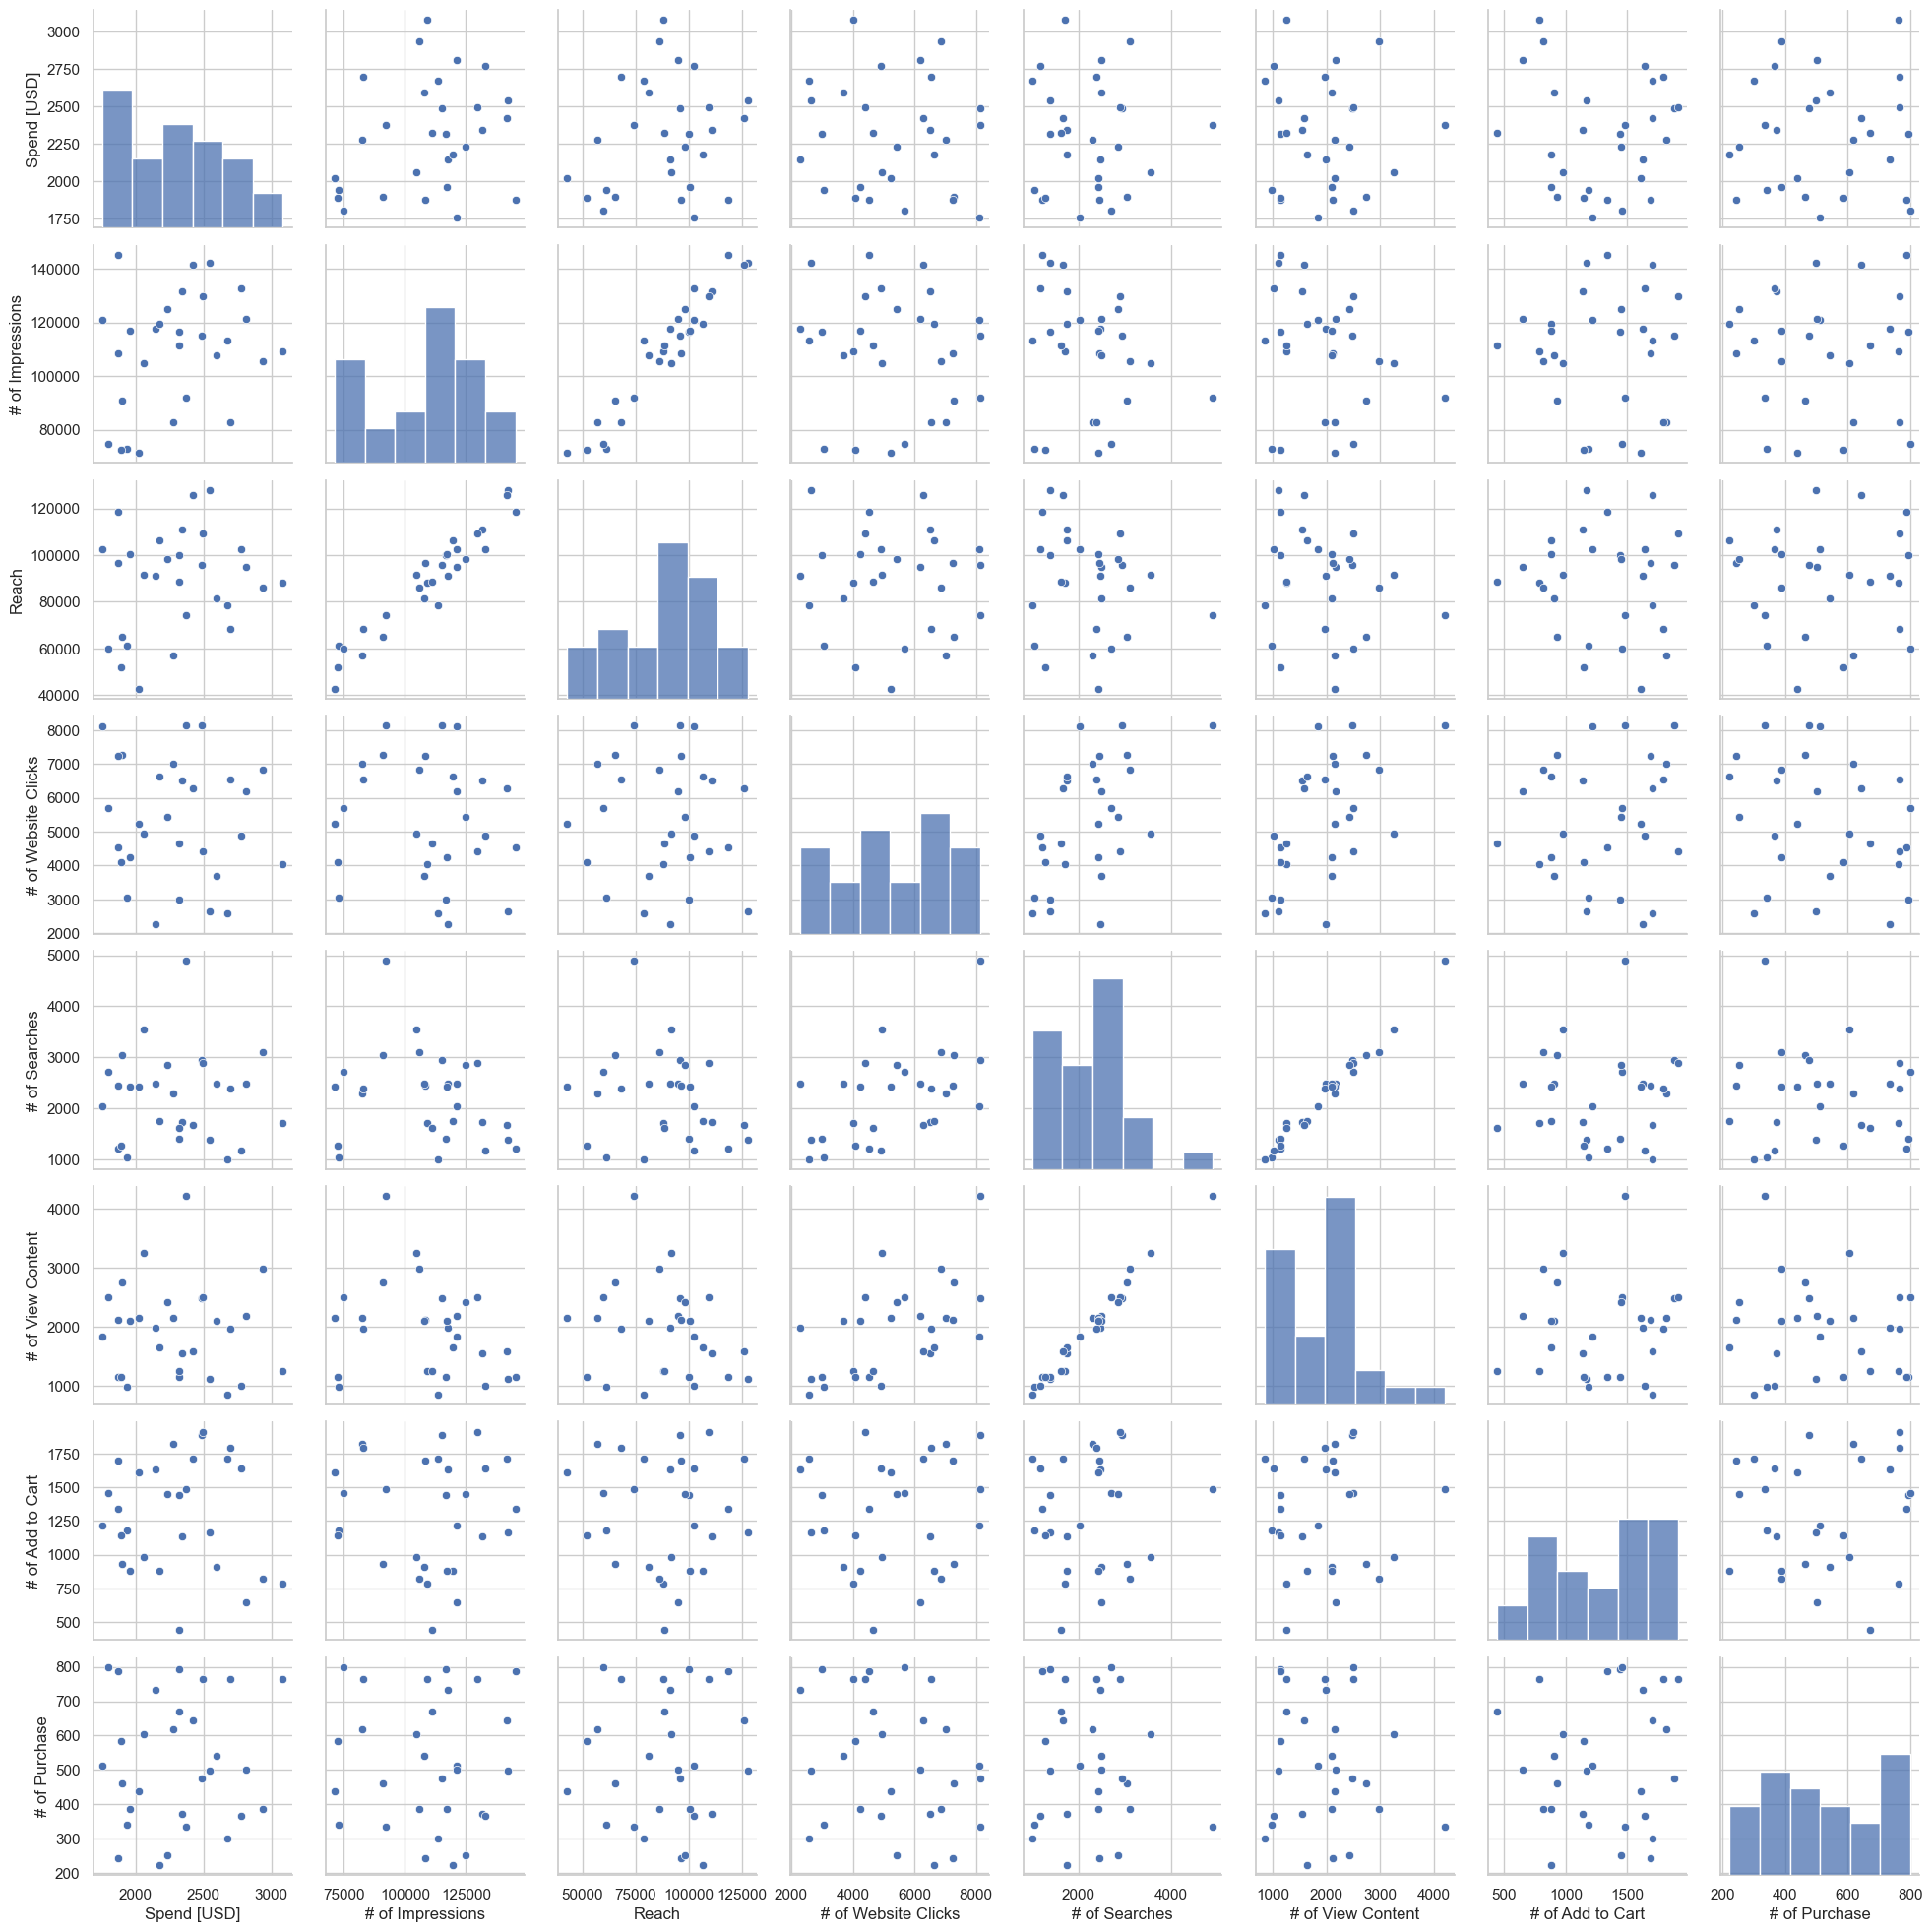

In [23]:
sns.pairplot(control_df)

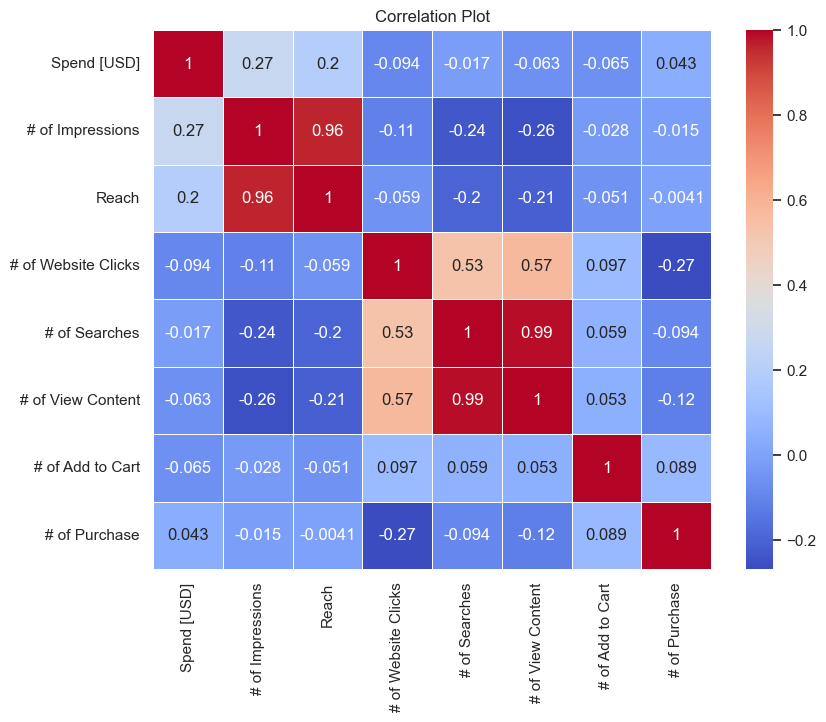

In [24]:
draw_corr_matr(control_df, cut3 = True)

Корелляция между потраченной суммой и полученными просмотрами увеличилась, но, возможно, статистически не значимо

## Создание агрегированных (производных) метрик и их анализ и проверка агрегированных метрик на нормальность

### test_df

In [25]:
def make_agg_df(df):
    for colname in df.columns[3:]:
        df[f'{colname} per spent dollar'] = df[colname] / df['Spend [USD]']
    return df.copy()

agg_test_df = make_agg_df(test_df)

cut_agg_test_df = agg_test_df.iloc[:,10:].copy()
cut_agg_test_df

# of Impressions per spent dollar  Reach per spent dollar  \
0                           13.148271               11.908245   
1                           39.621951               35.891424   
2                           29.709514               19.111205   
3                           28.948708                9.570849   
5                           17.365338               12.810822   
6                           19.022551               14.851304   
7                           11.546296                6.909808   
8                           17.161011               11.914781   
9                           34.069534               28.541935   
10                          34.559091               29.457025   
11                          44.009537                3.743554   
12                          33.380832               25.117140   
13                          22.193142               10.241230   
14                          37.495231               30.293720   
15                          34.650195               26.459363   
16                          48.700711               27.636687   
17                          27.100556               21.849924   
18                           8.576161                4.073877   
19                          14.553835               11.759956   
20                          42.985540               35.293702   
21                          11.987582                9.635047   
22                          25.046115               20.493976   
23                          17.637151               14.672281   
24                          41.180328               36.194672   
25                          34.980961               26.650368   
26                          38.239794               31.615437   
27                          24.311081               18.365376   
28                          24.044207               15.407843   
29                          60.800708               45.209914   

    # of Website Clicks per spent dollar  # of Searches per spent dollar  \
0                               1.009973                        0.646941   
1                               1.832022                        0.928009   
2                               3.334038                        1.087526   
3                               1.555720                        0.817712   
5                               3.046379                        0.754272   
6                               1.487315                        0.963002   
7                               2.463649                        0.983196   
8                               3.114253                        1.093137   
9                               2.912186                        0.828674   
10                              1.549587                        1.195455   
11                              2.919110                        0.735076   
12                              3.837728                        1.122211   
13                              1.573906                        0.780055   
14                              1.984499                        1.008347   
15                              2.210663                        0.865085   
16                              4.019309                        1.013720   
17                              3.491157                        1.426983   
18                              2.900609                        1.113481   
19                              2.230826                        0.759956   
20                              1.758033                        0.641067   
21                              1.528458                        0.684029   
22                              2.109265                        1.076859   
23                              3.443696                        1.293070   
24                              1.228142                        1.003074   
25                              1.652964                        0.881437   
26                              2.207547                        1.020926   
2

Нельзя сказать, что распределение у данных из колонки '# of Impressions per spent dollar' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки 'Reach per spent dollar' нормальное при уровне значимости 0.001. pvalue = 1.1861407584919007e-117
Нельзя сказать, что распределение у данных из колонки '# of Website Clicks per spent dollar' нормальное при уровне значимости 0.001. pvalue = 2.133879584912577e-25
Нельзя сказать, что распределение у данных из колонки '# of Searches per spent dollar' нормальное при уровне значимости 0.001. pvalue = 8.624889872632448e-17
Нельзя сказать, что распределение у данных из колонки '# of View Content per spent dollar' нормальное при уровне значимости 0.001. pvalue = 4.926930740440786e-12
Нельзя сказать, что распределение у данных из колонки '# of Add to Cart per spent dollar' нормальное при уровне значимости 0.001. pvalue = 2.650967706075745e-08
Нельзя сказать, что распределение у данных из колонки '# of 

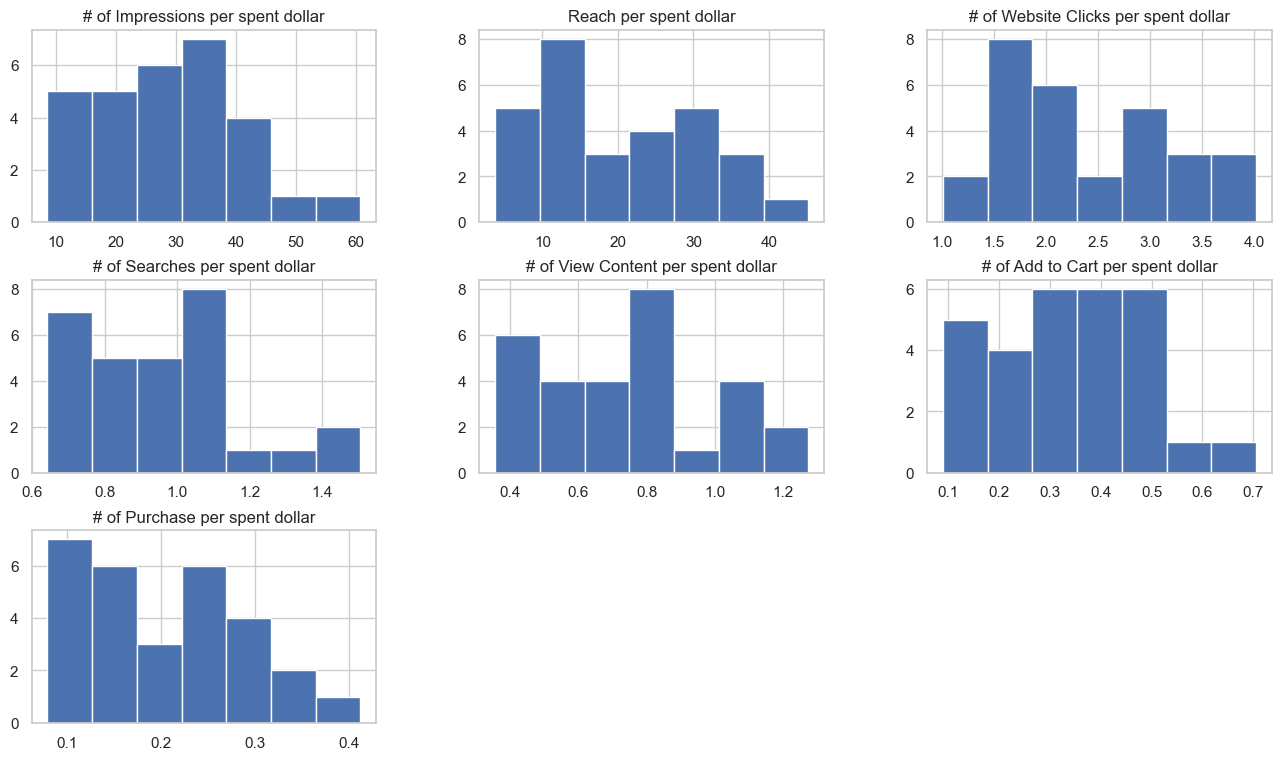

In [26]:
hist_and_ktest(cut_agg_test_df)

Нельзя сказать, что распределение у данных из колонки '# of Impressions per spent dollar' нормальное при уровне значимости 0.001. pvalue = 0.0


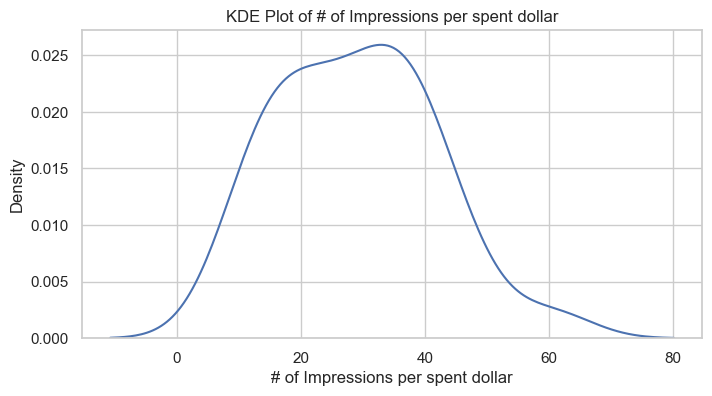

Нельзя сказать, что распределение у данных из колонки 'Reach per spent dollar' нормальное при уровне значимости 0.001. pvalue = 1.1861407584919007e-117


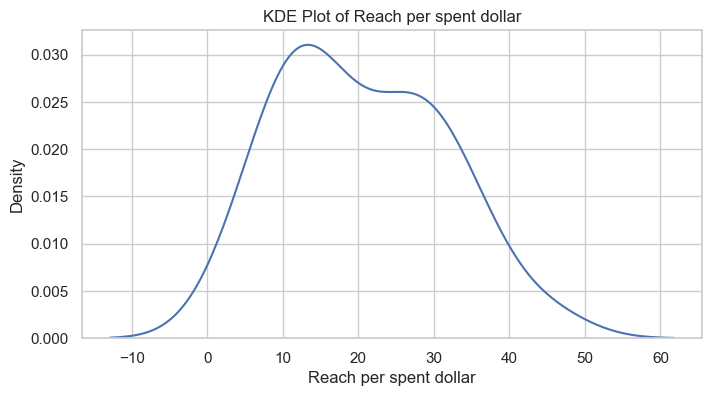

Нельзя сказать, что распределение у данных из колонки '# of Website Clicks per spent dollar' нормальное при уровне значимости 0.001. pvalue = 2.133879584912577e-25


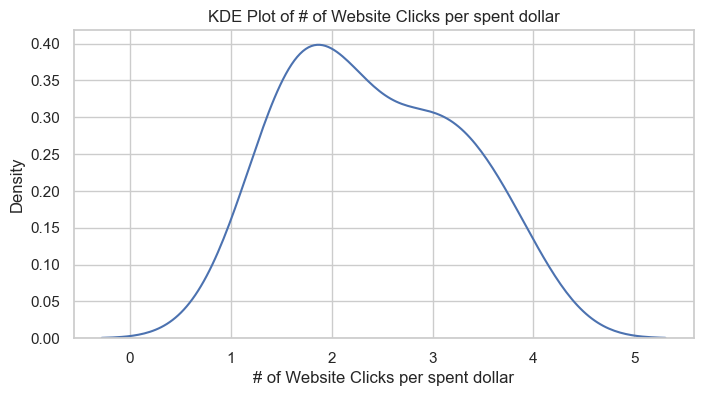

Нельзя сказать, что распределение у данных из колонки '# of Searches per spent dollar' нормальное при уровне значимости 0.001. pvalue = 8.624889872632448e-17


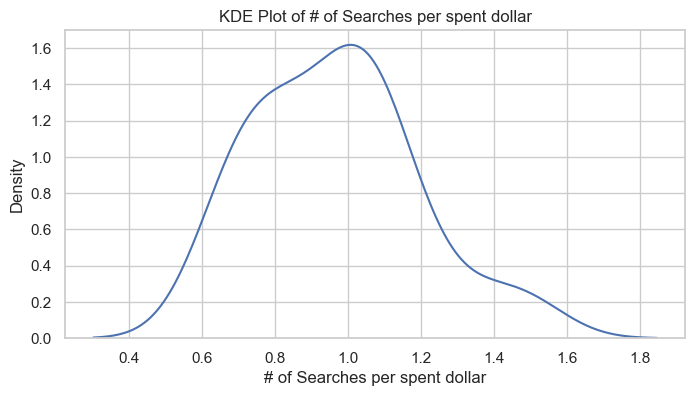

Нельзя сказать, что распределение у данных из колонки '# of View Content per spent dollar' нормальное при уровне значимости 0.001. pvalue = 4.926930740440786e-12


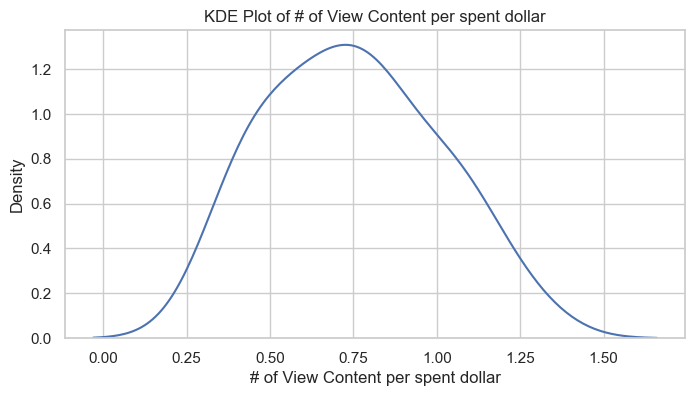

Нельзя сказать, что распределение у данных из колонки '# of Add to Cart per spent dollar' нормальное при уровне значимости 0.001. pvalue = 2.650967706075745e-08


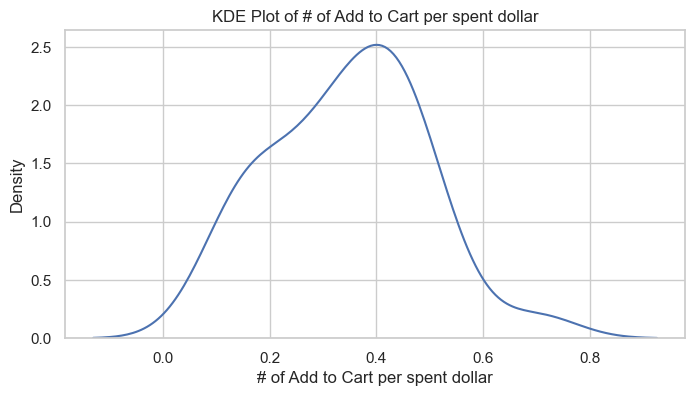

Нельзя сказать, что распределение у данных из колонки '# of Purchase per spent dollar' нормальное при уровне значимости 0.001. pvalue = 3.5959868001254386e-08


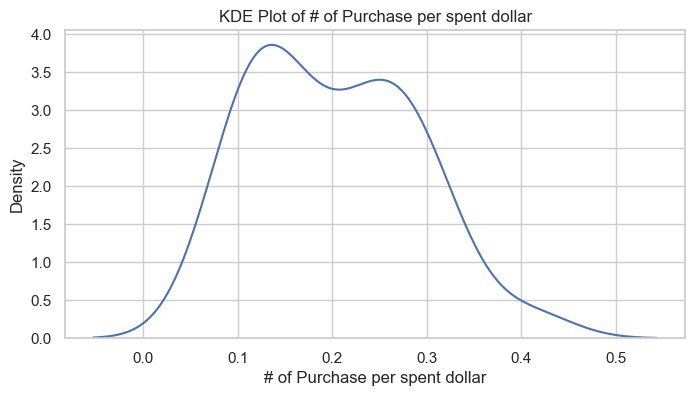

In [27]:
kde_and_ktest(cut_agg_test_df)

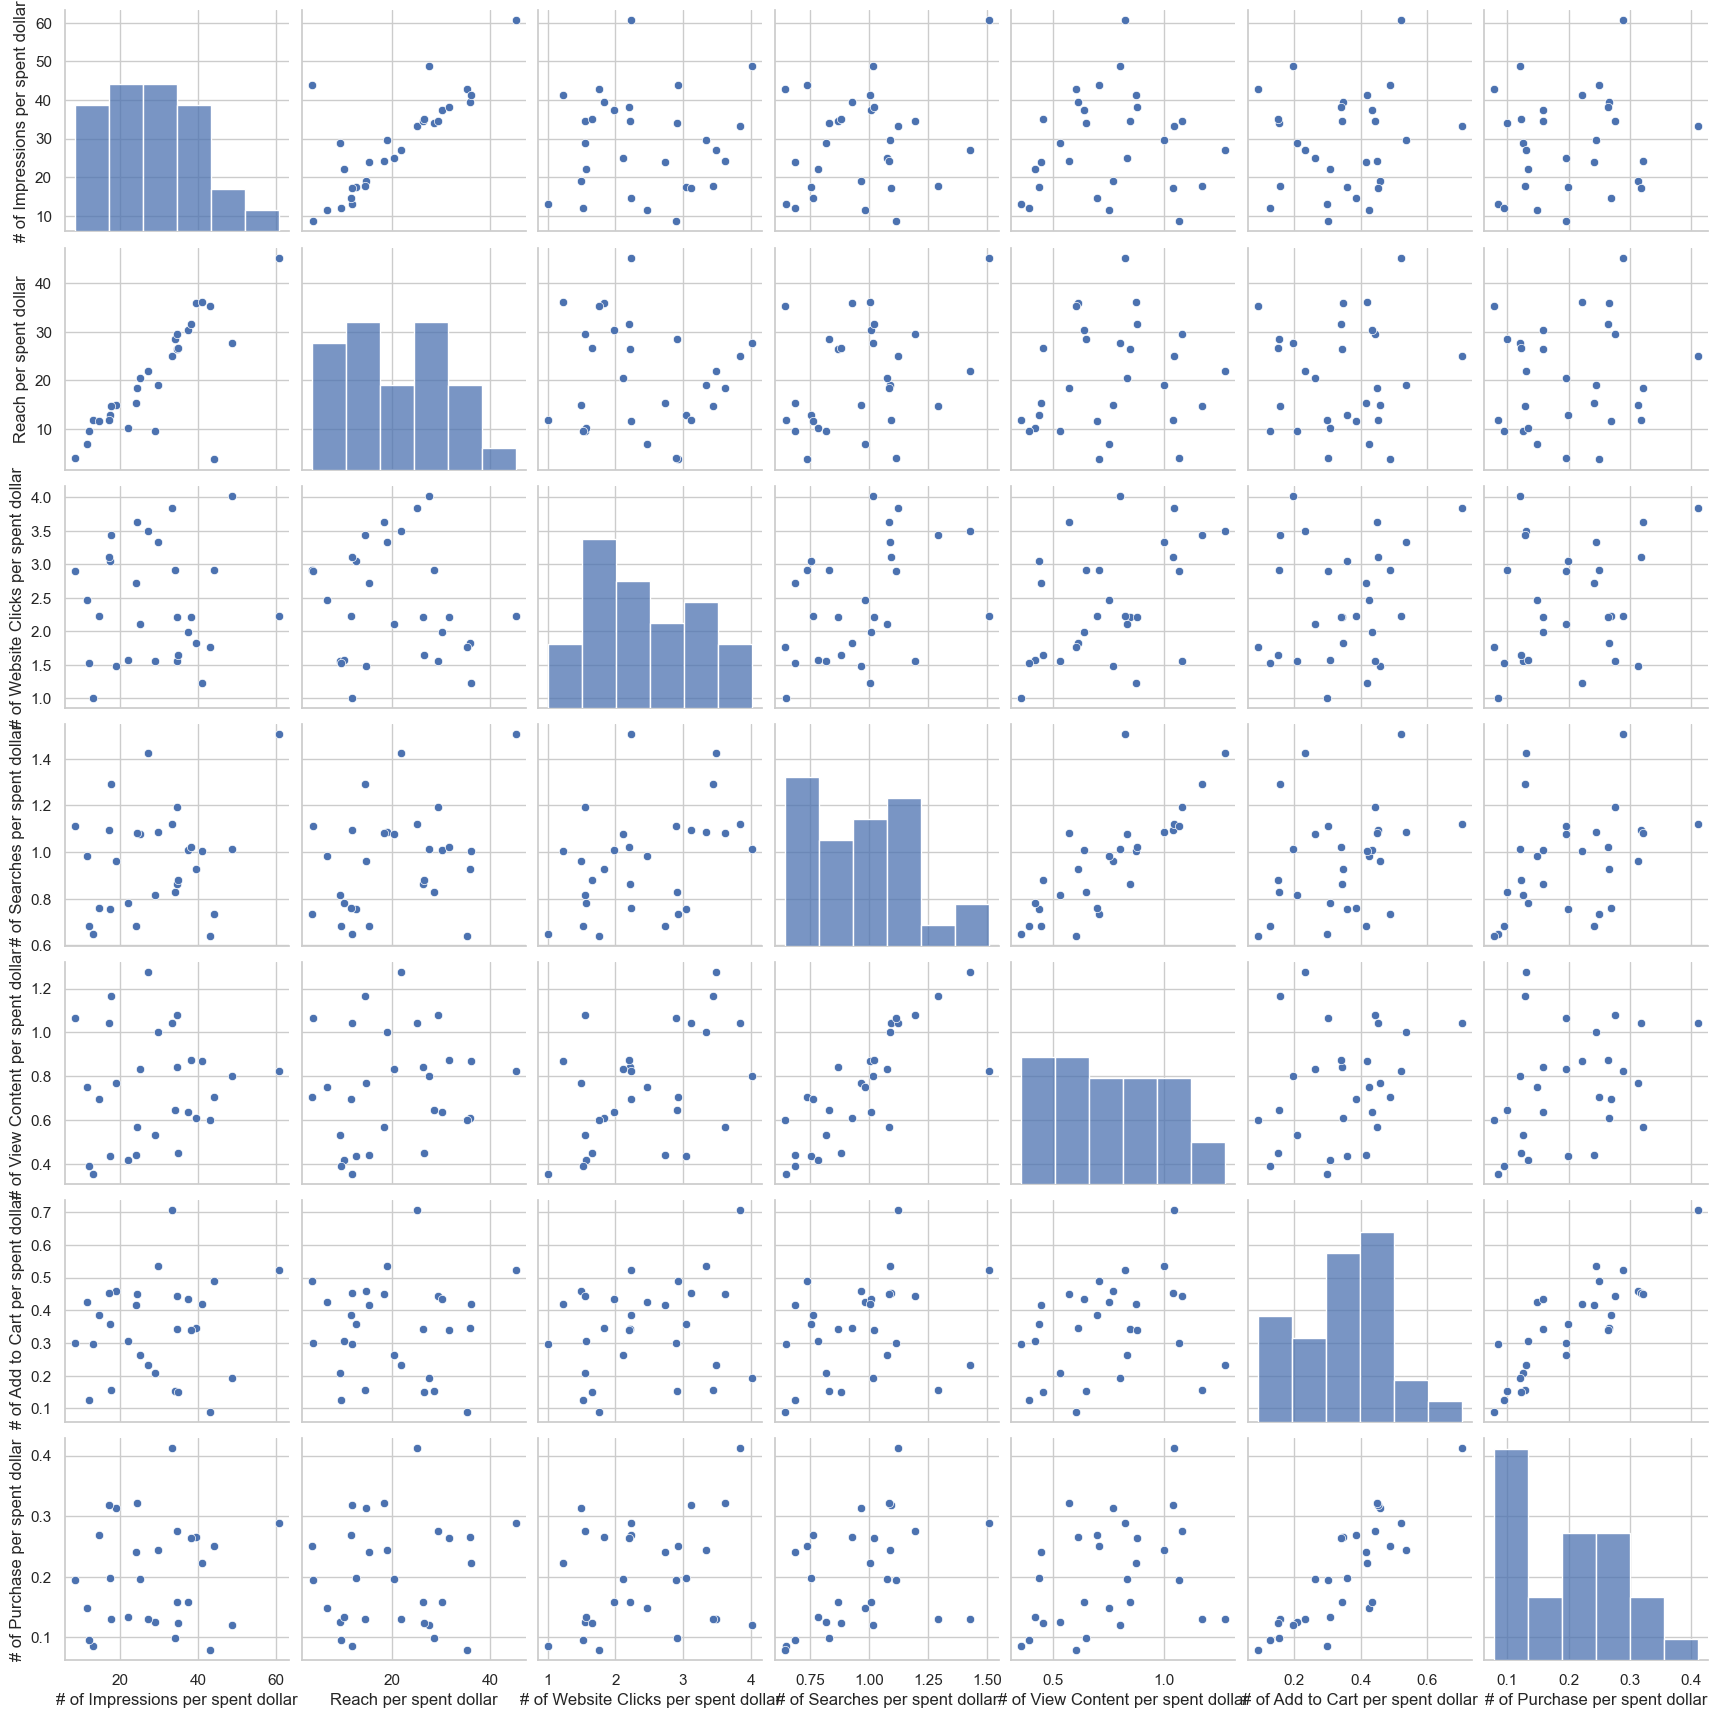

In [28]:
sns.pairplot(
    cut_agg_test_df
)

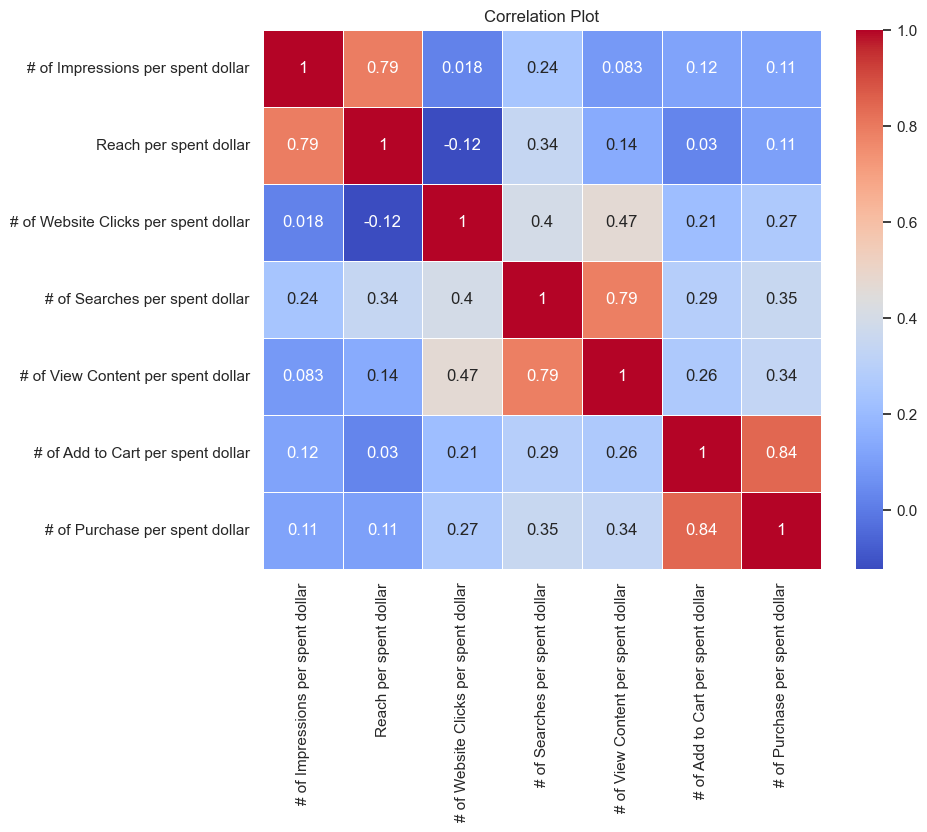

In [29]:
draw_corr_matr(cut_agg_test_df)

### control_df

In [30]:
agg_control_df = make_agg_df(control_df)

cut_agg_control_df = agg_control_df.iloc[:,10:].copy()
cut_agg_control_df

# of Impressions per spent dollar  Reach per spent dollar  \
0                           36.272807               24.969298   
1                           68.890154               58.345475   
2                           56.214682               47.316261   
3                           37.565979               31.564433   
5                           35.379825               28.542978   
6                           55.865959               50.256289   
7                           47.862632               34.324737   
8                           43.132599               33.734803   
9                           54.734295               42.464867   
10                          46.283936               38.491165   
11                          50.297111               43.203536   
12                          30.718205               25.292547   
13                          77.465600               63.270400   
14                          47.889329               36.942682   
15                          35.214427               21.175395   
16                          54.943500               48.928801   
17                          57.810235               51.448827   
18                          41.560092               31.305085   
19                          42.403738               29.392523   
20                          41.405435               33.207432   
21                          35.966315               29.335829   
22                          52.035256               43.835337   
23                          38.327167               27.477273   
24                          59.636086               51.171254   
25                          55.932378               44.080609   
26                          50.789908               44.434255   
27                          58.510533               51.992565   
28                          38.749053               31.238737   
29                          47.894148               38.137694   

    # of Website Clicks per spent dollar  # of Searches per spent dollar  \
0                               3.077193                        1.004386   
1                               4.615822                        1.157086   
2                               2.777636                        0.741357   
3                               1.579897                        0.537113   
5                               1.306520                        0.554330   
6                               1.037736                        0.545597   
7                               3.821053                        1.603684   
8                               2.203342                        0.884109   
9                               1.059563                        1.151698   
10                              3.267871                        1.181124   
11                              1.290643                        0.602415   
12                              2.430108                        0.886170   
13                              2.411200                        0.644800   
14                              1.764960                        0.425018   
15                              2.581028                        1.199111   
16                              3.044557                        0.806615   
17                              3.866205                        1.304371   
18                              1.427581                        0.956471   
19                              0.963738                        0.374206   
20                              3.156406                        1.503605   
21                              2.328343                        1.055461   
22                              1.766827                        1.160256   
23                              2.159091                        0.673362   
24                              2.158002                        1.234964   
25                              2.433945                        1.274966   
26                              2.397380                        1.721980   
2

Нельзя сказать, что распределение у данных из колонки '# of Impressions per spent dollar' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки 'Reach per spent dollar' нормальное при уровне значимости 0.001. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Website Clicks per spent dollar' нормальное при уровне значимости 0.001. pvalue = 7.861343025602231e-23
Нельзя сказать, что распределение у данных из колонки '# of Searches per spent dollar' нормальное при уровне значимости 0.001. pvalue = 2.5169072895721812e-12
Нельзя сказать, что распределение у данных из колонки '# of View Content per spent dollar' нормальное при уровне значимости 0.001. pvalue = 1.8912070333421152e-11
Нельзя сказать, что распределение у данных из колонки '# of Add to Cart per spent dollar' нормальное при уровне значимости 0.001. pvalue = 1.2576865298996521e-09
Нельзя сказать, что распределение у данных из колонки '# of Purchase per spen

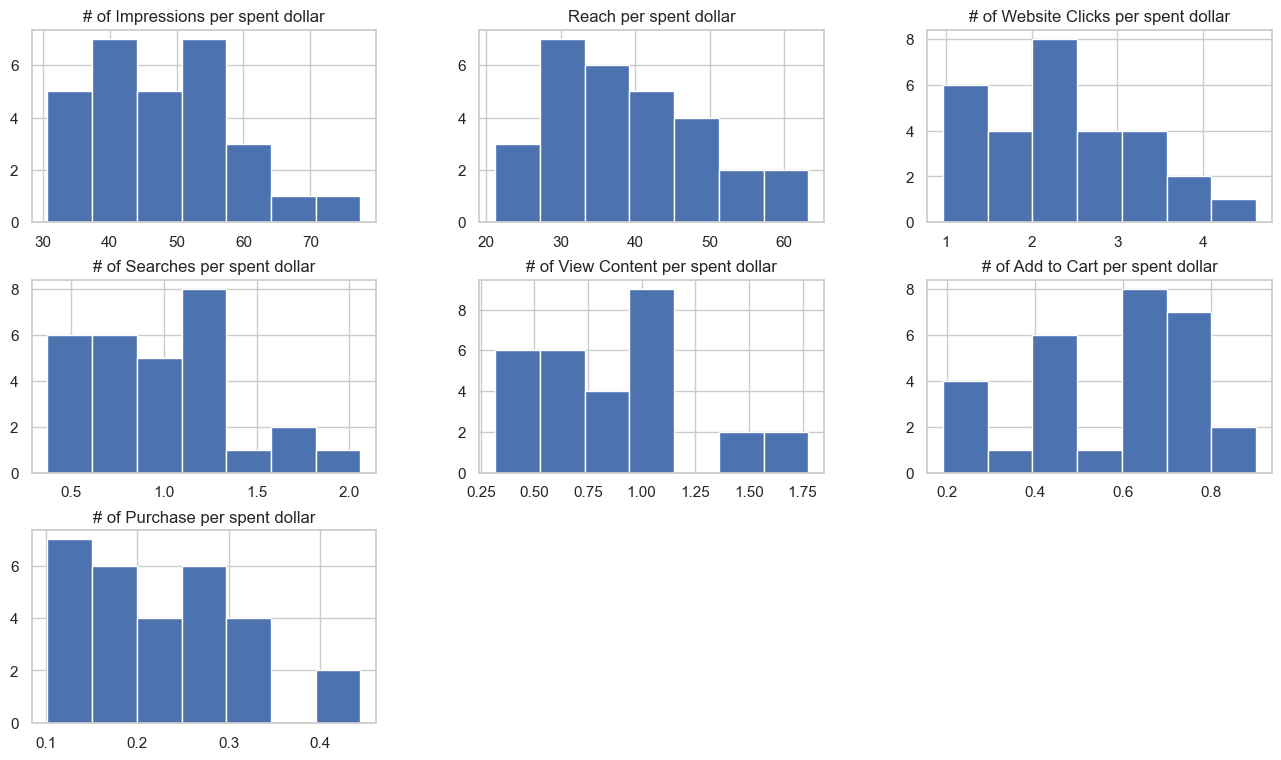

In [31]:
hist_and_ktest(cut_agg_control_df)

Нельзя сказать, что распределение у данных из колонки '# of Impressions per spent dollar' нормальное при уровне значимости 0.001. pvalue = 0.0


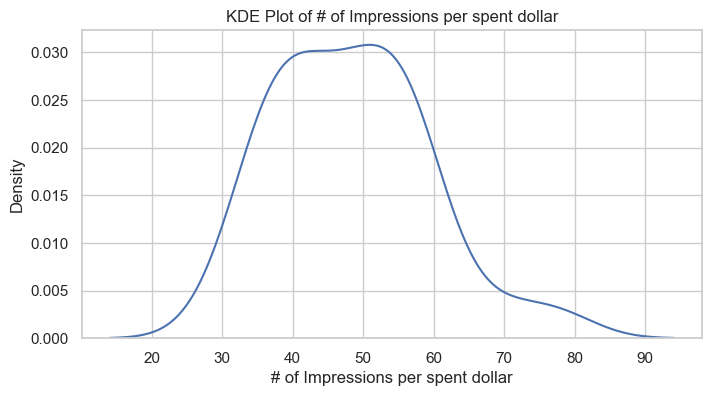

Нельзя сказать, что распределение у данных из колонки 'Reach per spent dollar' нормальное при уровне значимости 0.001. pvalue = 0.0


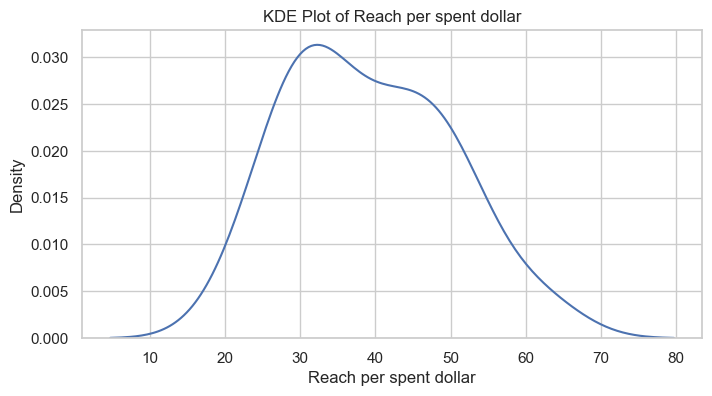

Нельзя сказать, что распределение у данных из колонки '# of Website Clicks per spent dollar' нормальное при уровне значимости 0.001. pvalue = 7.861343025602231e-23


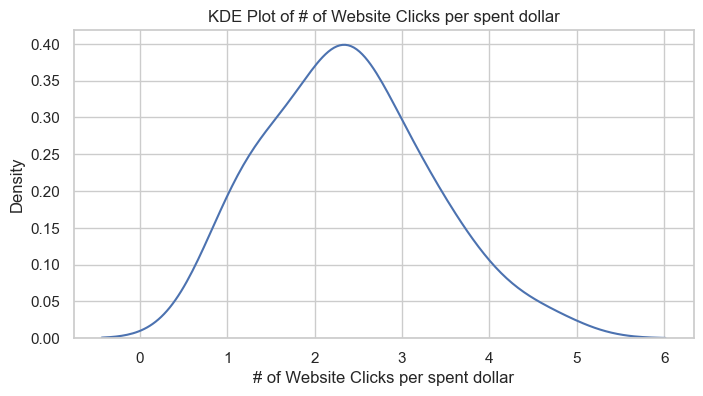

Нельзя сказать, что распределение у данных из колонки '# of Searches per spent dollar' нормальное при уровне значимости 0.001. pvalue = 2.5169072895721812e-12


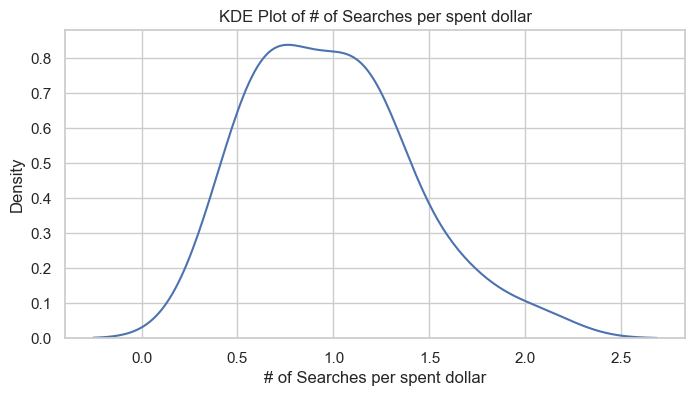

Нельзя сказать, что распределение у данных из колонки '# of View Content per spent dollar' нормальное при уровне значимости 0.001. pvalue = 1.8912070333421152e-11


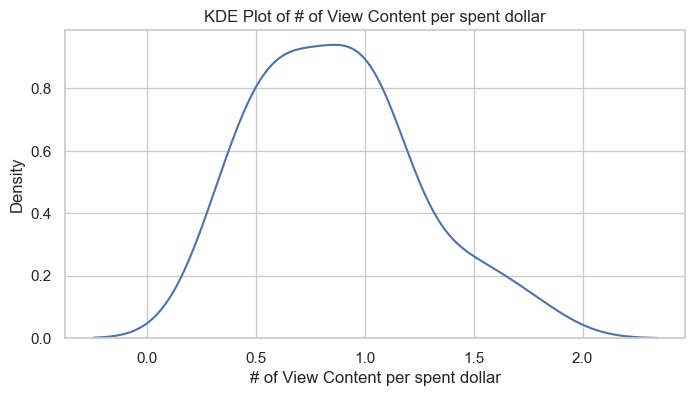

Нельзя сказать, что распределение у данных из колонки '# of Add to Cart per spent dollar' нормальное при уровне значимости 0.001. pvalue = 1.2576865298996521e-09


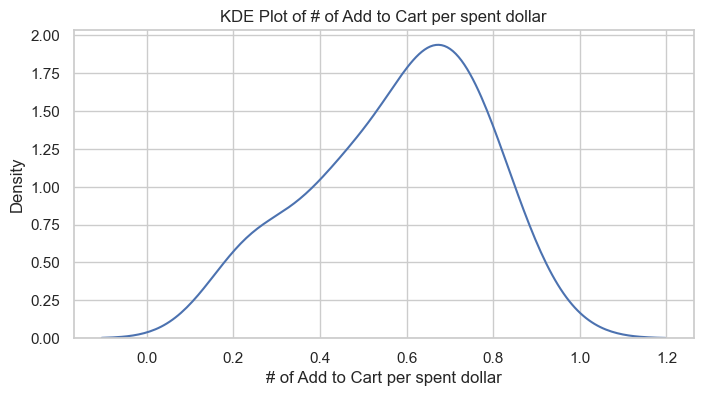

Нельзя сказать, что распределение у данных из колонки '# of Purchase per spent dollar' нормальное при уровне значимости 0.001. pvalue = 1.8357672620527876e-08


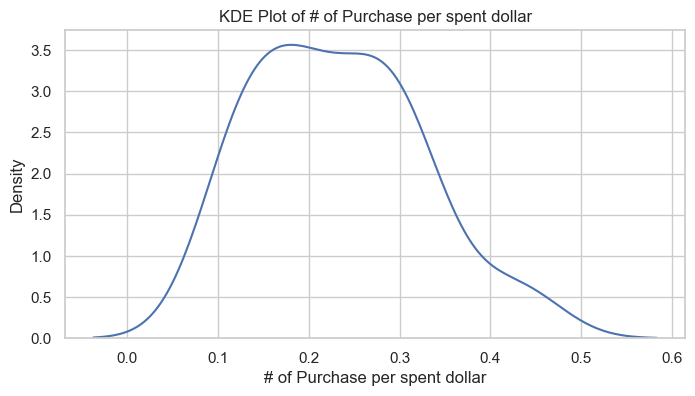

In [32]:
kde_and_ktest(cut_agg_control_df)

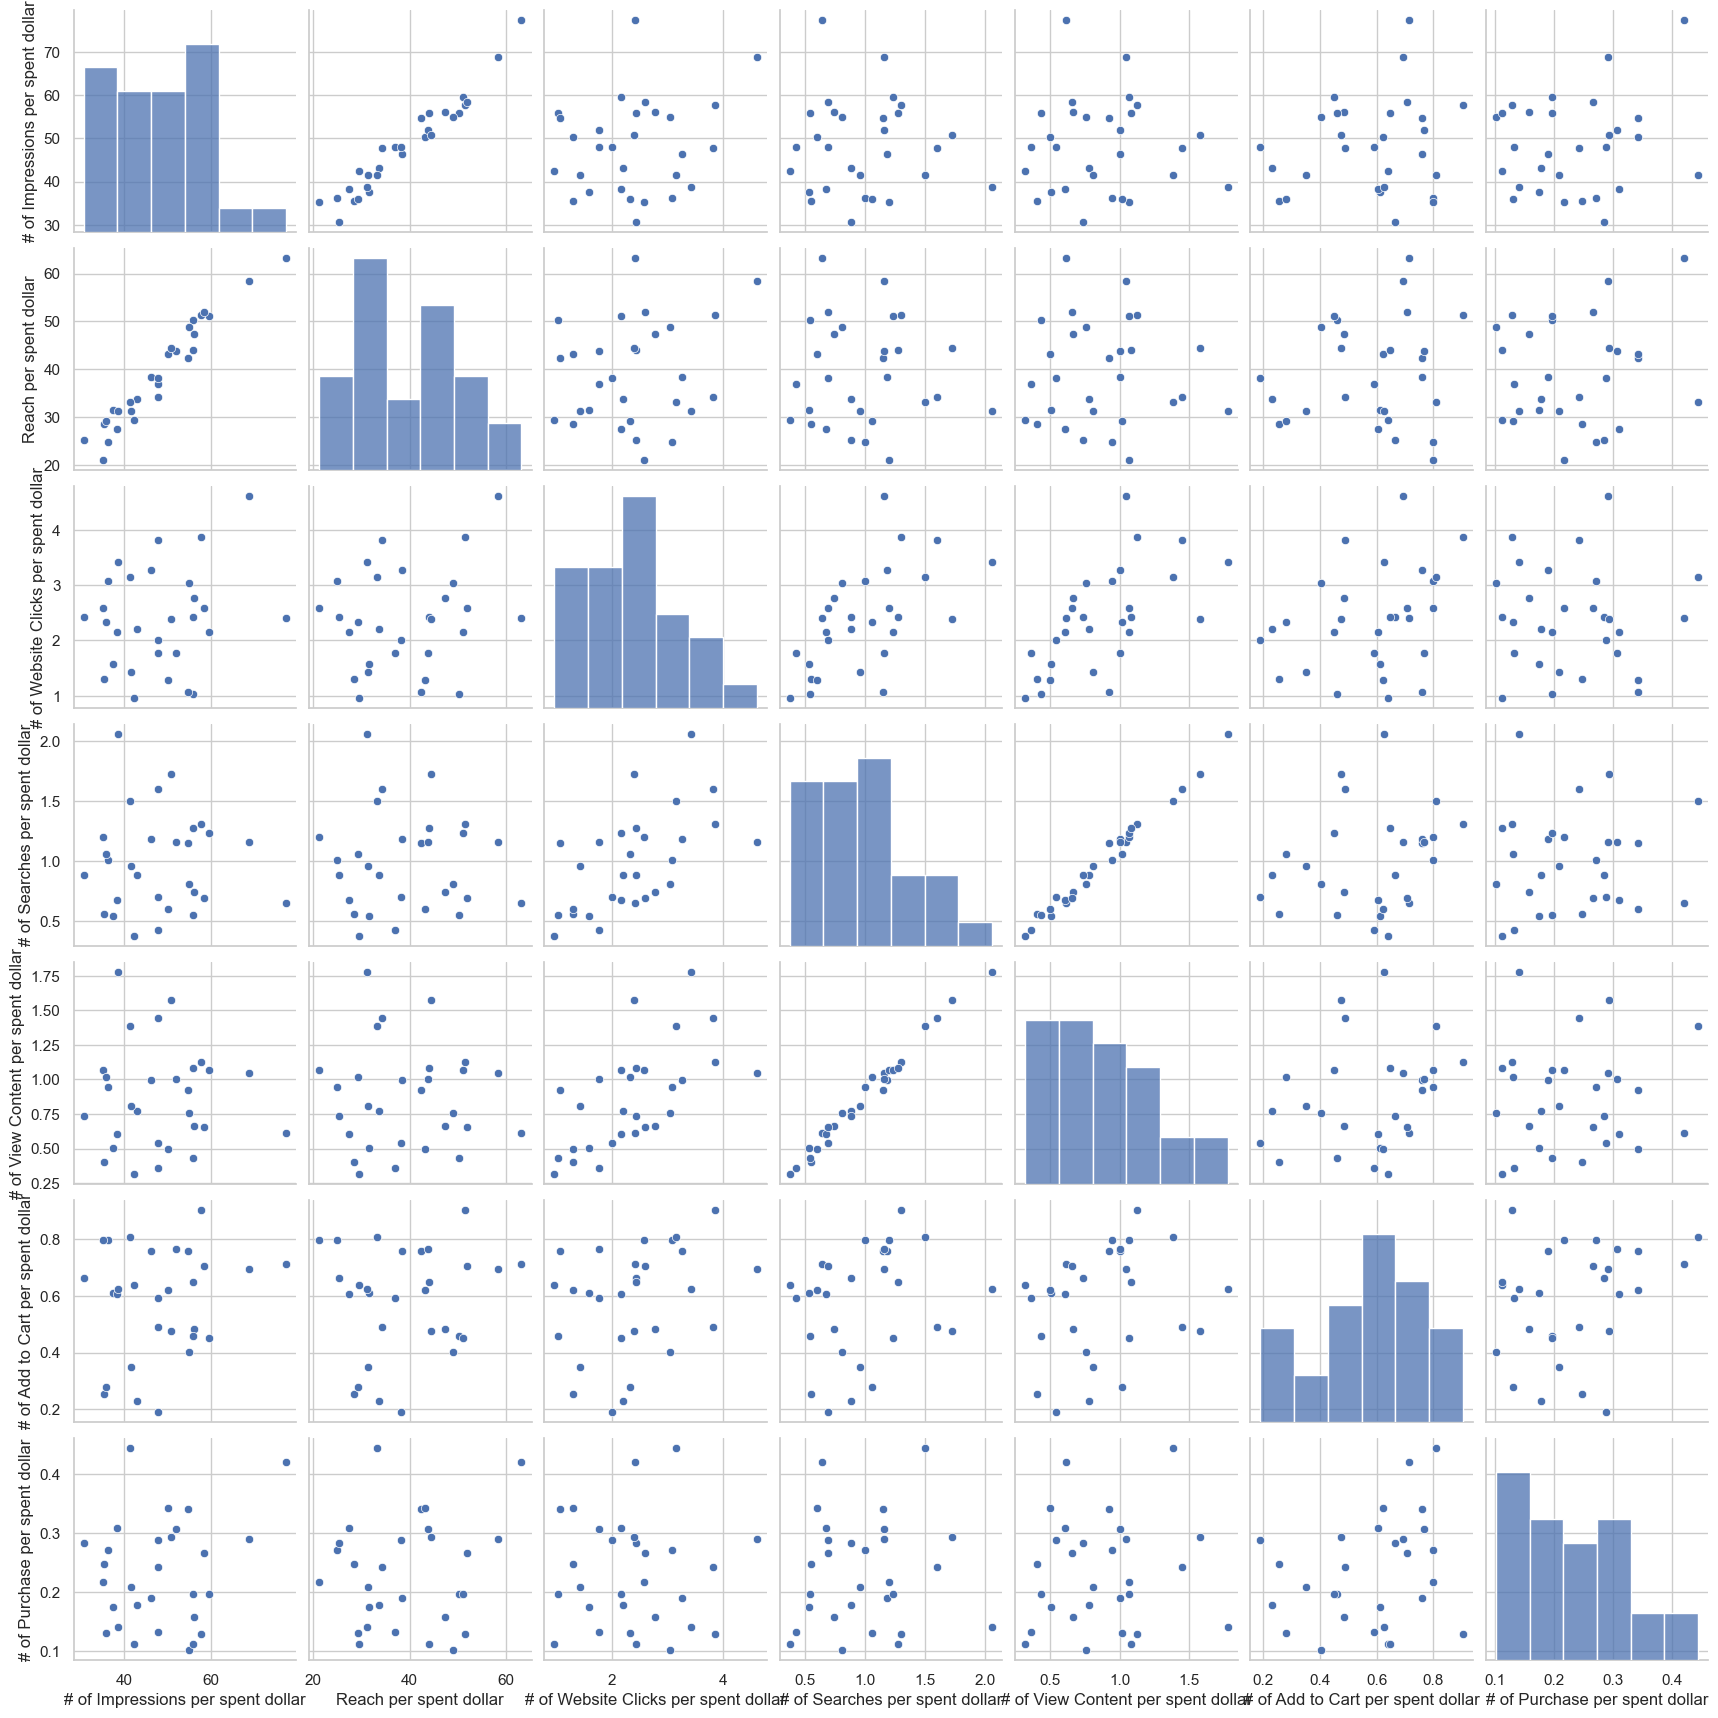

In [33]:
sns.pairplot(
    cut_agg_control_df
)

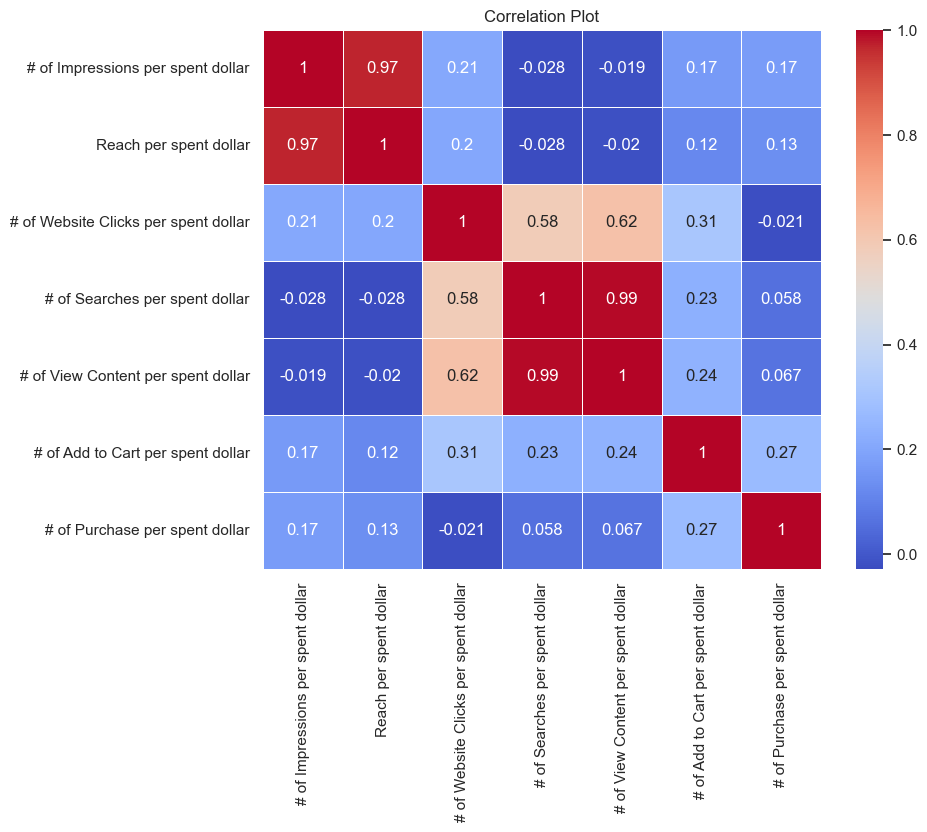

In [34]:
draw_corr_matr(cut_agg_control_df)

# Формулирование гипотезы. Подбор статистического критерия для тестирования гипотезы.

Стоит отметить, что итоговый результат по метрике "# of Impressions per spent dollar" (просмотры объявлений на потраченный доллар) в контрольной выборке больше, как это видно в двух запросах ниже.

In [35]:
cut_agg_test_df['# of Impressions per spent dollar'].sum()

837.0259321840498

In [36]:
cut_agg_control_df['# of Impressions per spent dollar'].sum()

1399.751383983898

In [37]:
cut_agg_test_df['# of Website Clicks per spent dollar'].sum()

69.97814176713291

In [38]:
cut_agg_control_df['# of Website Clicks per spent dollar'].sum()

68.94970289751417

1) Эксперимент влияет на количество просмотров - нельзя использовать глобальные методы CTR ($\frac{clicks}{views(ununique)}$). (https://vkteam.medium.com/practitioners-guide-to-statistical-tests-ed2d580ef04f)
2) CTR в данных не зависит от числа просмотров, однако из-за невыполнения первого пункта это всё равно полезных свойств не привносит.
3) Нельзя сказать, что распределение является нормальным. 

Значит следует использовать непараметрический критерий манна-уитни и t-test (далее о нём подробнее).

T-тесты предполагают строгие предположения о данных, таких как нормальность и равные дисперсии среди тестовых групп. Однако эмпирически t-тесты устойчивы к нарушениям предположений.

Нулевой гипотезой будет предположение, что нет статистически значимой разницы для бизнеса при использовании различных моделей ставки (сравнение средних по целевой метрике).

Альтернативная гипотеза - статистически значимая разница для бизнеса существует.

Целевая метрика: Cost per click (CPC).

Осталось проверить, значимо ли статистически данное изменение в рассматриваемой целевой метрике в целях бизнеса. Уровень значимости установим 0,05.

# Подсчет ключевых метрик. Оценка статистической значимости полученных результатов. Оценка ошибки первого и второго рода.

In [39]:
test_df['Cost per click'] = test_df['Spend [USD]'] / test_df['# of Website Clicks']
control_df['Cost per click'] = control_df['Spend [USD]'] / control_df['# of Website Clicks']

In [40]:
display(test_df.head(5))
display(control_df.head(5))

Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
5  Test Campaign  6.08.2019         2458             42684  31489   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
5                 7488           1854               1073               882   

   # of Purchase  # of Impressions per spent dollar  Reach per spent dollar  \
0            255                          13.148271               11.908245   
1            677                          39.621951               35.891424   
2            578                          29.709514               19.111205   
3            340                          28.948708                9.570849   
5            488                          17.365338               12.810822   

   # of Website Clicks per spent dollar  # of Searches per spent dollar  \
0                              1.009973                        0.646941   
1                              1.832022                        0.928009   
2                              3.334038                        1.087526   
3                              1.555720                        0.817712   
5                              3.046379                        0.754272   

   # of View Content per spent dollar  # of Add to Cart per spent dollar  \
0                            0.355386                           0.297207   
1                            0.608969                           0.345791   
2                            1.000846                           0.536152   
3                            0.530258                           0.208856   
5                            0.436534                           0.358828   

   # of Purchase per spent dollar  Cost per click  
0                        0.084774        0.990125  
1                        0.266326        0.545845  
2                        0.244397        0.299937  
3                        0.125461        0.642789  
5                        0.198535        0.328259

Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
5  Control Campaign  6.08.2019         3083          109076.0   87998.0   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
5               4028.0         1709.0             1249.0             784.0   

   # of Purchase  # of Impressions per spent dollar  Reach per spent dollar  \
0          618.0                          36.272807               24.969298   
1          511.0                          68.890154               58.345475   
2          372.0                          56.214682               47.316261   
3          340.0                          37.565979               31.564433   
5          764.0                          35.379825               28.542978   

   # of Website Clicks per spent dollar  # of Searches per spent dollar  \
0                              3.077193                        1.004386   
1                              4.615822                        1.157086   
2                              2.777636                        0.741357   
3                              1.579897                        0.537113   
5                              1.306520                        0.554330   

   # of View Content per spent dollar  # of Add to Cart per spent dollar  \
0                            0.946930                           0.797807   
1                            1.047809                           0.693796   
2                            0.661118                           0.483995   
3                            0.506186                           0.609794   
5                            0.405125                           0.254298   

   # of Purchase per spent dollar  Cost per click  
0                        0.271053        0.324971  
1                        0.290837        0.216646  
2                        0.158771        0.360018  
3                        0.175258        0.632953  
5                        0.247811        0.765392

In [41]:
test_df.describe()

Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    29.000000         29.000000      29.000000            29.000000   
mean   2572.241379      73215.482759   52055.482759          6038.172414   
std     351.155100      31786.355952   28190.975729          1738.505086   
min    1968.000000      22521.000000   10598.000000          3038.000000   
25%    2365.000000      45511.000000   31489.000000          4399.000000   
50%    2626.000000      67444.000000   43241.000000          6435.000000   
75%    2838.000000      95843.000000   76219.000000          7617.000000   
max    3112.000000     133771.000000  109834.000000          8264.000000   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  \
count      29.000000          29.000000         29.000000      29.000000   
mean     2429.758621        1892.482759        878.965517     512.724138   
std       391.022986         577.063355        353.446953     209.480633   
min      1854.000000        1046.000000        278.000000     238.000000   
25%      2037.000000        1437.000000        566.000000     284.000000   
50%      2432.000000        1894.000000        992.000000     488.000000   
75%      2824.000000        2427.000000       1168.000000     677.000000   
max      2978.000000        2801.000000       1391.000000     890.000000   

       # of Impressions per spent dollar  Reach per spent dollar  \
count                          29.000000               29.000000   
mean                           28.862963               20.540740   
std                            12.634893               10.829417   
min                             8.576161                3.743554   
25%                            17.637151               11.908245   
50%                            28.948708               19.111205   
75%                            37.495231               28.541935   
max                            60.800708               45.209914   

       # of Website Clicks per spent dollar  # of Searches per spent dollar  \
count                             29.000000                       29.000000   
mean                               2.413039                        0.965395   
std                                0.842107                        0.221737   
min                                1.009973                        0.641067   
25%                                1.652964                        0.780055   
50%                                2.225089                        0.983196   
75%                                3.046379                        1.087526   
max                                4.019309                        1.506323   

       # of View Content per spent dollar  # of Add to Cart per spent dollar  \
count                           29.000000                          29.000000   
mean                             0.749462                           0.344990   
std                              0.251831                           0.143968   
min                              0.355386                           0.089332   
25%                              0.570093                           0.232946   
50%                              0.752401                           0.345791   
75%                              0.875472                           0.444215   
max                              1.274381                           0.705375   

       # of Purchase per spent dollar  Cost per click  
count                       29.000000       29.000000  
mean                         0.202172        0.471371  
std                          0.086113        0.181124  
min                          0.078728        0.248799  
25%                          0.129451        0.328259  
50%                          0.196510        0.449420  
75%                          0.266326        0.604974  
max                          0.411765        0.990125

In [42]:
variance = np.var(test_df['Cost per click'])
print("Дисперсия 'Cost per click':", variance)


Дисперсия 'Cost per click': 0.03167465778325578


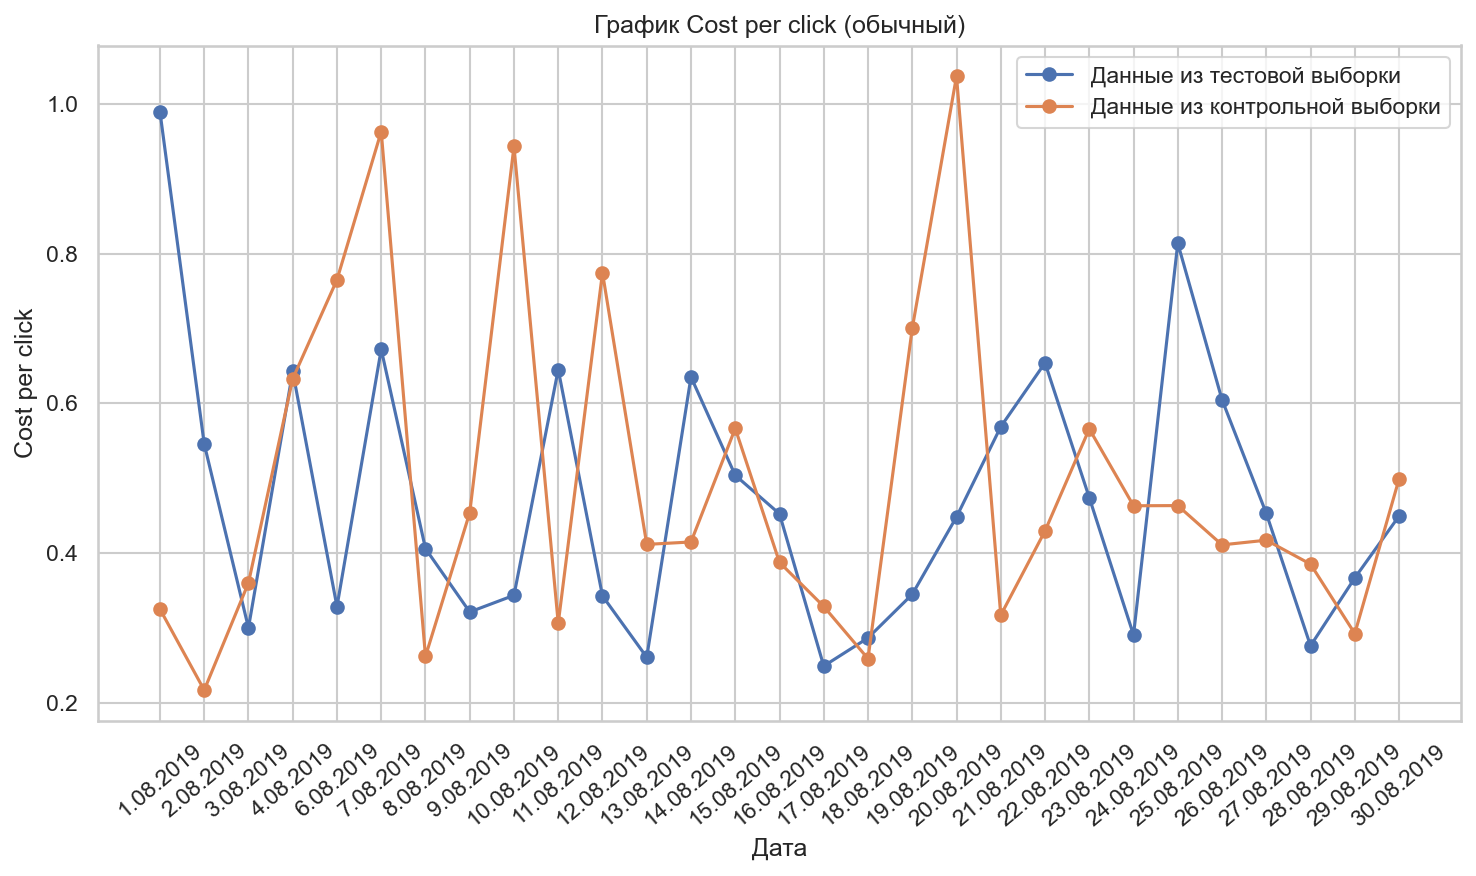

In [43]:
x = test_df['Date']  
y1 = test_df['Cost per click']  

y2 = control_df['Cost per click'] 

variance1 = np.var(y1)
variance2 = np.var(y2)

plt.figure(figsize=(10, 6), dpi=150) 

plt.plot(x, y1, label='Данные из тестовой выборки', marker='o', linestyle='-')

plt.plot(x, y2, label='Данные из контрольной выборки', marker='o', linestyle='-')

# plt.fill_between(x, y1 - variance1, y1 + variance1, color='blue', alpha=0.3, label='Дисперсия из тестовой выборки')

# plt.fill_between(x, y2 - variance2, y2 + variance2, color='orange', alpha=0.3, label='Дисперсия данных из контрольной выборки')

plt.xticks(rotation=40)

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Cost per click')
plt.title('График Cost per click (обычный)')

plt.grid(True) 
plt.tight_layout() 
plt.show()


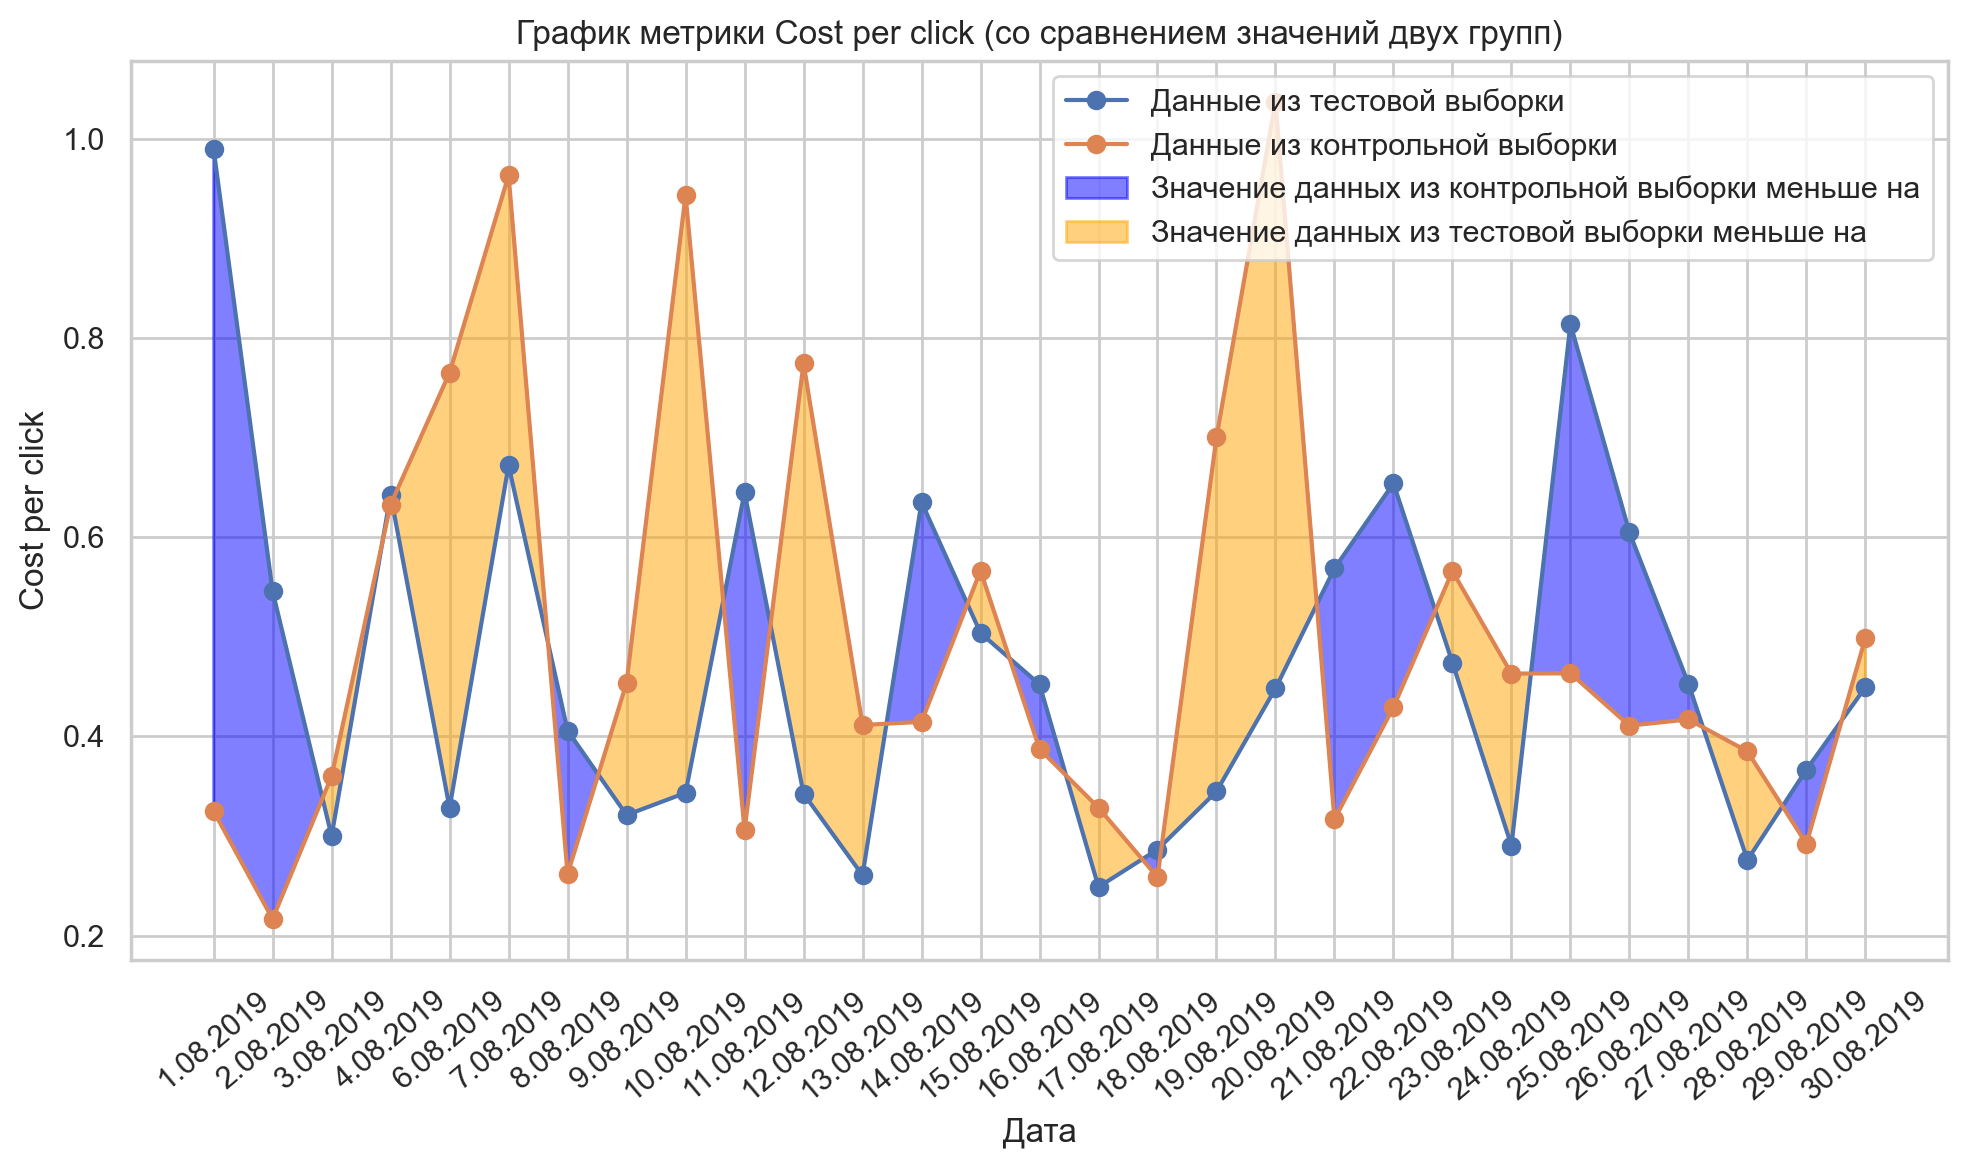

t-test:
Значение t-статистики: -0.4435700375156041
p-значение: 0.659062590489386
Не отвергаем нулевую гипотезу на уровне значимости 0.05: метрика не различается 

Тест Манна-Уитни:
Значение статистики: 409.0
p-значение: 0.8641732313428653
Не отвергаем нулевую гипотезу на уровне значимости 0.05: нет достаточных доказательств, чтобы отвергнуть нулевую гипотезу


In [44]:
x = test_df['Date']
y1 = test_df['Cost per click']
y2 = control_df['Cost per click']

plt.figure(figsize=(10, 6), dpi=200)

plt.plot(x, y1, label='Данные из тестовой выборки', marker='o', linestyle='-')

plt.plot(x, y2, label='Данные из контрольной выборки', marker='o', linestyle='-')

plt.fill_between(x, y1, y2, where=(y1 > y2), interpolate=True, alpha=0.5, color='blue', label='Значение данных из контрольной выборки меньше на')
plt.fill_between(x, y1, y2, where=(y1 < y2), interpolate=True, alpha=0.5, color='orange', label='Значение данных из тестовой выборки меньше на')

plt.xticks(rotation=40)

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Cost per click')
plt.title('График метрики Cost per click (со сравнением значений двух групп)')

plt.grid(True)
plt.tight_layout()
plt.show()

print('t-test:')
t_stat, p_value = stats.ttest_ind(y1, y2)

print(f"Значение t-статистики: {t_stat}")
print(f"p-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу на уровне значимости {alpha}: метрика различается", '\n')
else:
    print(f"Не отвергаем нулевую гипотезу на уровне значимости {alpha}: метрика не различается", '\n')

# Тест Манна-Уитни
print('Тест Манна-Уитни:')
statistic, p_value = stats.mannwhitneyu(y1, y2)

print(f"Значение статистики: {statistic}")
print(f"p-значение: {p_value}")

if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу на уровне значимости {alpha}: метрика различается")
else:
    print(f"Не отвергаем нулевую гипотезу на уровне значимости {alpha}: нет достаточных доказательств, чтобы отвергнуть нулевую гипотезу")




In [45]:
effect_size = (y1.mean() - y2.mean()) / y1.std()
print('Размер эффекта:', effect_size)

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(y1), alpha=alpha, power=None)

print('Мощность теста:', power)

Размер эффекта: -0.1299494881821237
Мощность теста: 0.07751463135217083


In [46]:
print(f'Ошибка первого рода = {alpha}, ошибка 2 рода = {1-power}')

Ошибка первого рода = 0.05, ошибка 2 рода = 0.9224853686478292


Мощность теста довольно низкая, поэтому нельзя сказать, что знания полученные в ходе теста значимые

Проведём примитивную ручную проверку:

In [47]:
cpc = pd.DataFrame({'Date': x, 'test_CPC': y1, 'control_CPC': y2})
cpc

Date  test_CPC  control_CPC
0    1.08.2019  0.990125     0.324971
1    2.08.2019  0.545845     0.216646
2    3.08.2019  0.299937     0.360018
3    4.08.2019  0.642789     0.632953
5    6.08.2019  0.328259     0.765392
6    7.08.2019  0.672353     0.963636
7    8.08.2019  0.405902     0.261708
8    9.08.2019  0.321104     0.453856
9   10.08.2019  0.343385     0.943786
10  11.08.2019  0.645333     0.306010
11  12.08.2019  0.342570     0.774808
12  13.08.2019  0.260571     0.411504
13  14.08.2019  0.635362     0.414731
14  15.08.2019  0.503905     0.566585
15  16.08.2019  0.452353     0.387443
16  17.08.2019  0.248799     0.328455
17  18.08.2019  0.286438     0.258652
18  19.08.2019  0.344755     0.700486
19  20.08.2019  0.448264     1.037626
20  21.08.2019  0.568817     0.316816
21  22.08.2019  0.654254     0.429490
22  23.08.2019  0.474099     0.565986
23  24.08.2019  0.290386     0.463158
24  25.08.2019  0.814238     0.463392
25  26.08.2019  0.604974     0.410856
26  27.08.2019  0.452991     0.417122
27  28.08.2019  0.275909     0.385080
28  29.08.2019  0.366619     0.292236
29  30.08.2019  0.449420     0.498927

In [48]:
cpc['test_smaller'] = cpc['test_CPC'] < cpc['control_CPC']

In [49]:
cpc['test_bigger'] = cpc['test_CPC'] < cpc['control_CPC']

In [50]:
cpc.test_smaller.sum()

15

In [51]:
cpc.test_bigger.sum()

15

In [52]:
print(np.mean(cpc['test_CPC']), np.mean(cpc['control_CPC']))

0.47137090624135786 0.49490787453545826


Теперь попробую статистически оценить разницу у метрики Cost per view (CPV)

In [53]:
test_df['Cost per view'] = test_df['Spend [USD]'] / test_df['# of Impressions']
control_df['Cost per view'] = control_df['Spend [USD]'] / control_df['# of Impressions']

In [54]:
display(test_df.head(5))
display(control_df.head(5))

Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
5  Test Campaign  6.08.2019         2458             42684  31489   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
5                 7488           1854               1073               882   

   # of Purchase  # of Impressions per spent dollar  Reach per spent dollar  \
0            255                          13.148271               11.908245   
1            677                          39.621951               35.891424   
2            578                          29.709514               19.111205   
3            340                          28.948708                9.570849   
5            488                          17.365338               12.810822   

   # of Website Clicks per spent dollar  # of Searches per spent dollar  \
0                              1.009973                        0.646941   
1                              1.832022                        0.928009   
2                              3.334038                        1.087526   
3                              1.555720                        0.817712   
5                              3.046379                        0.754272   

   # of View Content per spent dollar  # of Add to Cart per spent dollar  \
0                            0.355386                           0.297207   
1                            0.608969                           0.345791   
2                            1.000846                           0.536152   
3                            0.530258                           0.208856   
5                            0.436534                           0.358828   

   # of Purchase per spent dollar  Cost per click  Cost per view  
0                        0.084774        0.990125       0.076056  
1                        0.266326        0.545845       0.025239  
2                        0.244397        0.299937       0.033659  
3                        0.125461        0.642789       0.034544  
5                        0.198535        0.328259       0.057586

Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
5  Control Campaign  6.08.2019         3083          109076.0   87998.0   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
5               4028.0         1709.0             1249.0             784.0   

   # of Purchase  # of Impressions per spent dollar  Reach per spent dollar  \
0          618.0                          36.272807               24.969298   
1          511.0                          68.890154               58.345475   
2          372.0                          56.214682               47.316261   
3          340.0                          37.565979               31.564433   
5          764.0                          35.379825               28.542978   

   # of Website Clicks per spent dollar  # of Searches per spent dollar  \
0                              3.077193                        1.004386   
1                              4.615822                        1.157086   
2                              2.777636                        0.741357   
3                              1.579897                        0.537113   
5                              1.306520                        0.554330   

   # of View Content per spent dollar  # of Add to Cart per spent dollar  \
0                            0.946930                           0.797807   
1                            1.047809                           0.693796   
2                            0.661118                           0.483995   
3                            0.506186                           0.609794   
5                            0.405125                           0.254298   

   # of Purchase per spent dollar  Cost per click  Cost per view  
0                        0.271053        0.324971       0.027569  
1                        0.290837        0.216646       0.014516  
2                        0.158771        0.360018       0.017789  
3                        0.175258        0.632953       0.026620  
5                        0.247811        0.765392       0.028265

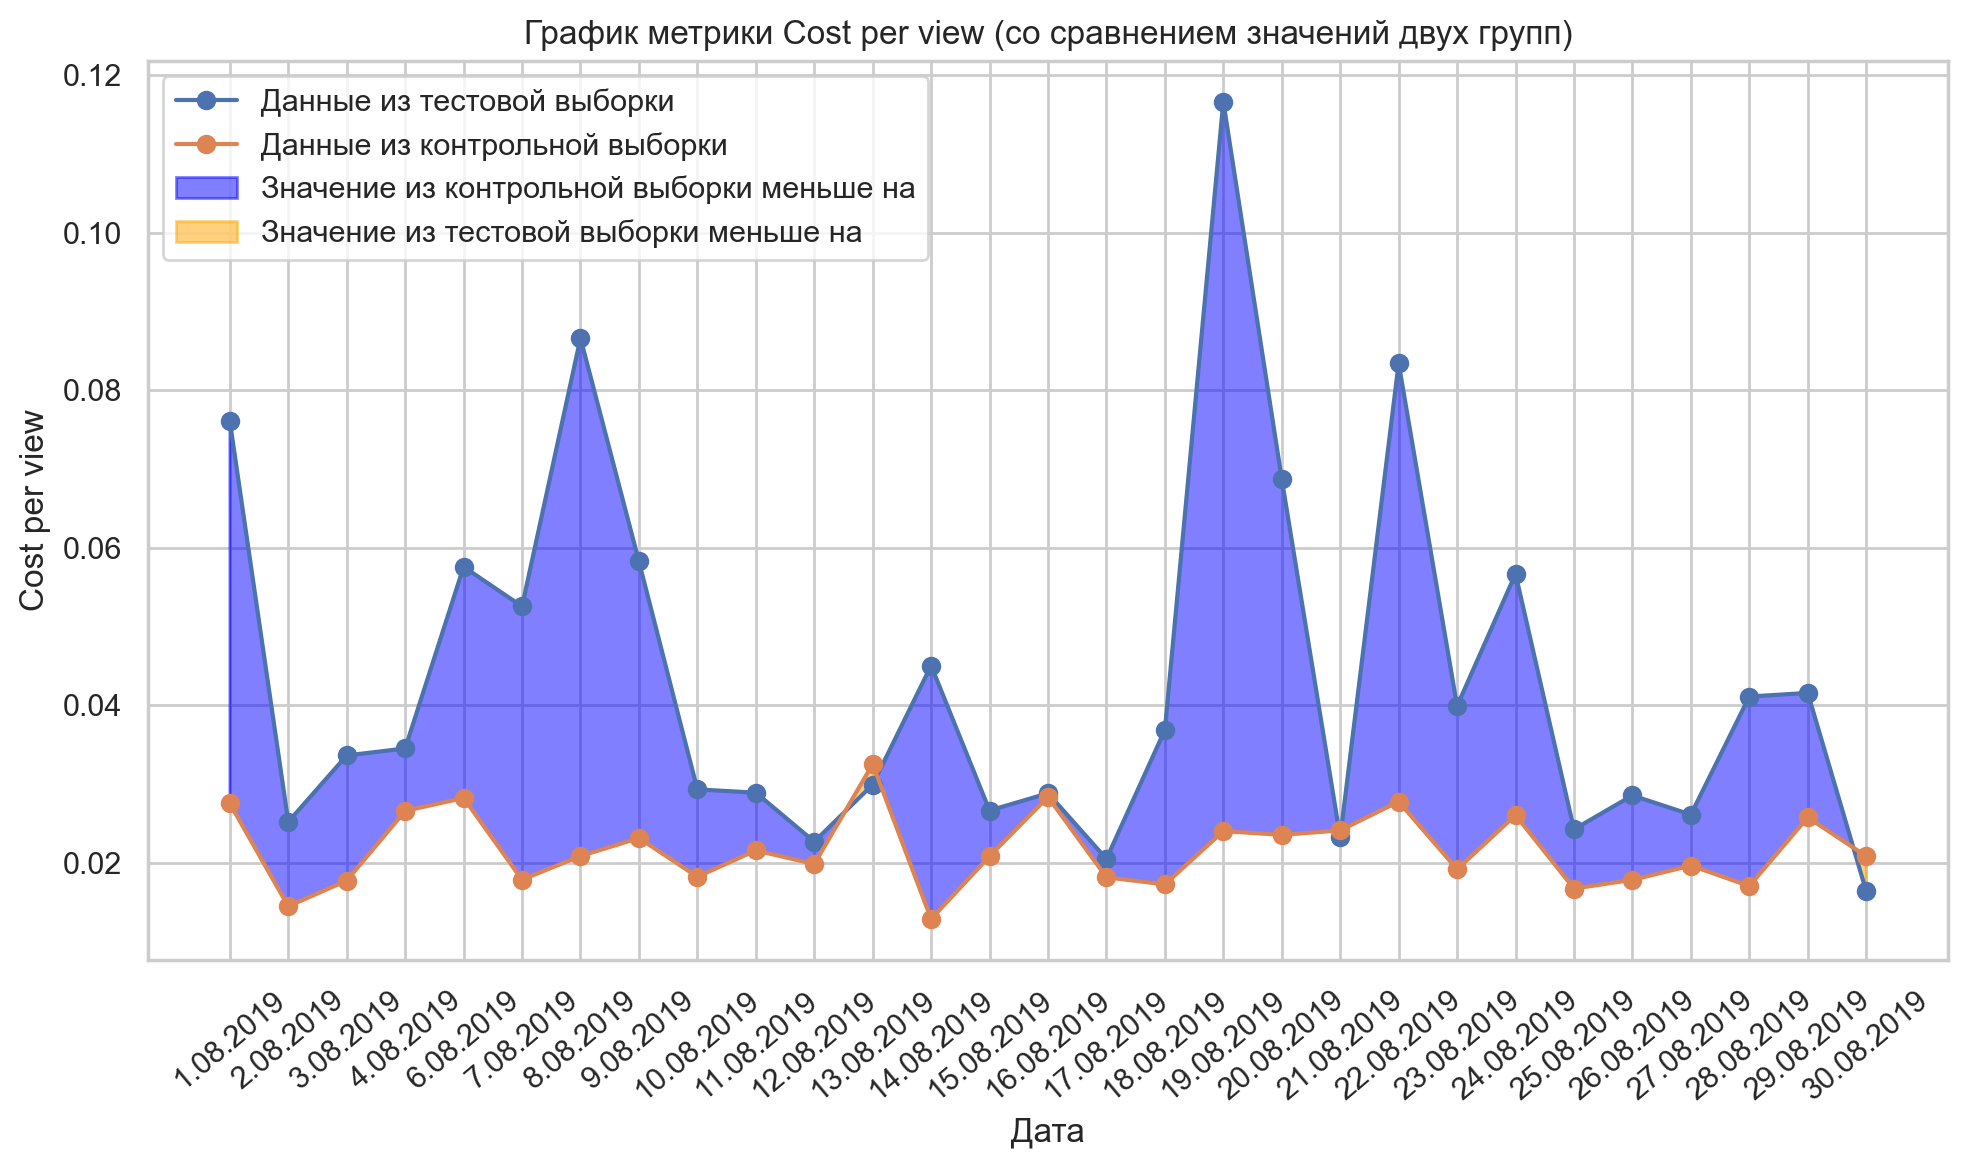

t-test:
Значение t-статистики: 4.829210961834349
p-значение: 1.1005633588702026e-05
Отвергаем нулевую гипотезу на уровне значимости 0.05: метрика различается 

Тест Манна-Уитни:
Значение статистики: 743.0
p-значение: 5.513648950589143e-07
Отвергаем нулевую гипотезу на уровне значимости 0.05: метрика различается


In [55]:
x = test_df['Date']
y1 = test_df['Cost per view']
y2 = control_df['Cost per view']

plt.figure(figsize=(10, 6), dpi=200)

plt.plot(x, y1, label='Данные из тестовой выборки', marker='o', linestyle='-')

plt.plot(x, y2, label='Данные из контрольной выборки', marker='o', linestyle='-')

plt.fill_between(x, y1, y2, where=(y1 > y2), interpolate=True, alpha=0.5, color='blue', label='Значение из контрольной выборки меньше на')
plt.fill_between(x, y1, y2, where=(y1 < y2), interpolate=True, alpha=0.5, color='orange', label='Значение из тестовой выборки меньше на')

plt.xticks(rotation=40)

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Cost per view')
plt.title('График метрики Cost per view (со сравнением значений двух групп)')

plt.grid(True)
plt.tight_layout()
plt.show()

print('t-test:')
t_stat, p_value = stats.ttest_ind(y1, y2)

print(f"Значение t-статистики: {t_stat}")
print(f"p-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу на уровне значимости {alpha}: метрика различается", '\n')
else:
    print(f"Не отвергаем нулевую гипотезу на уровне значимости {alpha}: метрика не различается", '\n')

# Тест Манна-Уитни
print('Тест Манна-Уитни:')
statistic, p_value = stats.mannwhitneyu(y1, y2)

print(f"Значение статистики: {statistic}")
print(f"p-значение: {p_value}")

if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу на уровне значимости {alpha}: метрика различается")
else:
    print(f"Не отвергаем нулевую гипотезу на уровне значимости {alpha}: нет достаточных доказательств, чтобы отвергнуть нулевую гипотезу")




Действительно, "Максимальная ставка" часто используется, когда рекламодатели хотят максимизировать видимость своих объявлений и готовы платить за это дополнительные средства.

In [56]:
effect_size = (y1.mean() - y2.mean()) / y1.std()
print('Размер эффекта:',effect_size)

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(y1), alpha=alpha, power=None)

print('Мощность теста:', power)

print(f'Ошибка первого рода = {alpha}, ошибка 2 рода = {1-power}')

Размер эффекта: 0.9145122308104513
Мощность теста: 0.9281398617301012
Ошибка первого рода = 0.05, ошибка 2 рода = 0.07186013826989879


/Users/maksimlyara/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maksimlyara/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


# Выводы

Таким образом, если есть цель занять наиболее высокое положение в результатах поиска или наиболее видное место на платформе, даже если это означает более высокую стоимость клика или показа, то следует использовать "Максимальную ставку", однако по результатам статистических тестов видно, что это действительно приводит к большим затратам, поэтому целесообразнее, более правильно с точки зрения статистических тестов использовать "Среднюю ставку".

Тест на определение статистической значимости между двумя группами при рассмотрении метрики Cost per click (CPC) не показал нам значимых результатов, таким образом, по этому критерию нет смысла делать какие-либо выводы.

Тест на определение статистической значимости между двумя группами при рассмотрении метрики Cost per view (CPV) указал на то, что цена за просмотр пользователем рекламного объявления значимо выше у контрольной группы (группы, использующей "Максимальную ставку").

Рекомендация: использовать "Среднюю ставку" в целях снижения затрат на "узнаваемость" бренда, который является целью ретаргетинговой кампании.